# **CRISP-DM Framework Outline for CKD Prediction Study**  


## **1. Business Understanding**  
### Defining the Research Problem and Objectives
Chronic Kidney Disease (CKD) is a progressive condition characterized by the gradual loss of kidney function over time. Early identification of CKD progression is crucial for timely medical interventions, which can slow disease progression and improve patient outcomes. Traditional methods for predicting CKD progression rely on clinical expertise and standard diagnostic tests, but these approaches can be limited by subjectivity, delayed diagnoses, and variability in patient responses to treatment.

The objective of this study is to develop a machine learning-based predictive model that can accurately forecast the progression of CKD in patients based on clinical and laboratory data. By leveraging machine learning, the study aims to identify patterns in patient health records that may indicate faster or slower disease progression, allowing for better risk stratification and treatment planning.

### Understanding the Impact of CKD and Its Progression
CKD is a major global health concern, affecting millions of individuals and placing a significant burden on healthcare systems. The disease is often asymptomatic in its early stages, leading to late diagnoses when kidney damage is already severe. Patients with CKD progress through five stages, with the final stage (End-Stage Renal Disease, ESRD) requiring dialysis or kidney transplantation. Predicting CKD progression is essential for:

###  Identifying high-risk patients early.
Adjusting treatment plans to slow disease progression.
Allocating healthcare resources more effectively.
Advancements in machine learning provide an opportunity to enhance predictive accuracy by analyzing complex interactions within clinical datasets, offering a data-driven approach to CKD management.

### Justifying the Need for a Machine Learning-Based Predictive Model
Machine learning models offer several advantages over traditional statistical approaches in predicting CKD progression:

- Improved Accuracy – Machine learning algorithms can detect subtle patterns in clinical data that may be missed by conventional methods.
- Automation – The model can provide real-time predictions, assisting healthcare professionals in decision-making.
Personalized Predictions – By analyzing patient-specific data, machine learning models can predict individualized disease trajectories.
- Scalability – A trained model can process large amounts of patient data efficiently, making it suitable for widespread clinical use.
Given the increasing prevalence of CKD and the need for better early-warning systems, a machine learning-based predictive model will contribute significantly to proactive CKD management, potentially reducing complications and improving patient outcomes.

## 2. Data Understanding    


Here is a table summarizing the dataset features, their abbreviations, descriptions, and data types:  

| Feature Name        | Abbreviation | Description                                              | Data Type |  
|-------------------------|-----------------|--------------------------------------------------------------|--------------|  
| ID                 | `id`            | Unique identifier for each patient                          | `int64`      |  
| **Age**                | `age`           | Age of the patient (years)                                  | `float64`    |  
| **Blood Pressure**      | `bp`            | Diastolic blood pressure (mmHg)                             | `float64`    |  
| **Specific Gravity**    | `sg`            | Urine concentration measurement                             | `float64`    |  
| **Albumin**            | `al`            | Albumin levels in urine (0-5 scale)                         | `float64`    |  
| **Sugar**              | `su`            | Sugar levels in urine (0-5 scale)                           | `float64`    |  
| **Red Blood Cells**     | `rbc`           | Red blood cell condition (`normal`, `abnormal`)             | `object`     |  
| **Pus Cells**          | `pc`            | Pus cell condition (`normal`, `abnormal`)                   | `object`     |  
| **Pus Cell Clumps**    | `pcc`           | Presence of pus cell clumps (`present`, `not present`)      | `object`     |  
| **Bacteria**           | `ba`            | Presence of bacteria in urine (`present`, `not present`)    | `object`     |  
| **Blood Glucose Random** | `bgr`         | Random blood glucose levels (mg/dL)                         | `float64`    |  
| **Blood Urea**         | `bu`            | Blood urea levels (mg/dL)                                   | `float64`    |  
| **Serum Creatinine**   | `sc`            | Serum creatinine levels (mg/dL)                             | `float64`    |  
| **Sodium**            | `sod`           | Sodium concentration in blood (mEq/L)                       | `float64`    |  
| **Potassium**         | `pot`           | Potassium concentration in blood (mEq/L)                    | `float64`    |  
| **Hemoglobin**        | `hemo`          | Hemoglobin level in blood (g/dL)                            | `float64`    |  
| **Packed Cell Volume** | `pcv`           | Ratio of red blood cells in total blood volume              | `object`     |  
| **White Blood Cell Count** | `wc`       | White blood cell count (cells/cumm)                         | `object`     |  
| **Red Blood Cell Count** | `rc`         | Red blood cell count (millions/cmm)                         | `object`     |  
| **Hypertension**      | `htn`           | Presence of hypertension (`yes`, `no`)                      | `object`     |  
| **Diabetes Mellitus** | `dm`            | Presence of diabetes (`yes`, `no`)                          | `object`     |  
| **Coronary Artery Disease** | `cad`     | Presence of coronary artery disease (`yes`, `no`)           | `object`     |  
| **Appetite**          | `appet`         | Appetite condition (`good`, `poor`)                         | `object`     |  
| **Pedal Edema**       | `pe`            | Swelling in legs (`yes`, `no`)                              | `object`     |  
| **Anemia**            | `ane`           | Presence of anemia (`yes`, `no`)                            | `object`     |  
| **Classification**    | `classification` | CKD status (`ckd`, `notckd`)                                | `object`     |  
| **Glomerular Filtration Rate** | `gfr` | Estimated GFR (mL/min/1.73m²)                               | `float64`    |  
| **CKD Stage**         | `ckd_stage`     | CKD stage classification (1–5)                              | `int64`      |  



In [1]:
# 1. Data Handling and Preprocessing
import pandas as pd  # For handling tabular data
import numpy as np  # For numerical operations
from sklearn.pipeline import Pipeline  # For creating pipelines
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler  # For encoding and scaling data
from sklearn.compose import ColumnTransformer  # For transforming columns in the dataset
from sklearn.model_selection import train_test_split, cross_val_score  # For splitting and validating data

# 2. Statistical Analysis
import scipy.stats as stats  # For statistical functions
from scipy.stats import chi2_contingency  # For Chi-square tests

# 3. Machine Learning Models
from sklearn.ensemble import RandomForestClassifier  # Random Forest model
from xgboost import XGBClassifier  # XGBoost model
from lightgbm import LGBMClassifier  # LightGBM model
from catboost import CatBoostClassifier  # CatBoost model
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.linear_model import LogisticRegression  # Logistic Regression model

# 4. Model Evaluation and Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report  # For performance metrics

# 5. Data Visualization
import matplotlib.pyplot as plt  # For basic plots
import seaborn as sns  # For advanced statistical visualizations
import plotly.express as px  # For interactive visualizations

# 6. Handling Class Imbalance (Optional)
from imblearn.over_sampling import SMOTE  # Synthetic Minority Oversampling Technique

# 7. Joblib (For Saving Models)
import joblib  # For saving models

# 8. Warnings
import warnings
warnings.filterwarnings("ignore")  # Suppress unnecessary warnings


## Import Datasets

In [2]:
## Import Datasets
df = pd.read_csv('../Datasets/1/ckd_stages_dataset.csv')

df.head(100)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,rc,htn,dm,cad,appet,pe,ane,classification,gfr,ckd_stage
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,5.2,yes,yes,no,good,no,no,ckd,61.643701,1
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,NaN,no,no,no,good,no,no,ckd,134.234408,0
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,NaN,no,yes,no,poor,no,yes,ckd,34.220303,3
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,3.9,yes,no,no,poor,yes,yes,ckd,15.298909,4
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,4.6,no,no,no,good,no,no,ckd,50.095393,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,62.0,90.0,1.015,1.0,0.0,NaN,normal,notpresent,notpresent,...,NaN,yes,no,no,good,yes,yes,ckd,62.067544,1
96,96,60.0,80.0,1.010,1.0,1.0,NaN,normal,notpresent,notpresent,...,NaN,no,yes,yes,poor,no,no,ckd,21.256464,4
97,97,65.0,60.0,1.015,1.0,0.0,NaN,normal,notpresent,notpresent,...,4.0,yes,yes,no,poor,yes,no,ckd,26.288575,4
98,98,50.0,140.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,2.3,yes,yes,no,poor,no,yes,ckd,7.883246,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

#### **Observations:**  
- Several features have **missing values**, with the highest missingness in `rbc` (**38%**), `rc` (**32.5%**), and `wc` (**26.25%**).  
- Some numerical features (`pcv`, `wc`, `rc`) are incorrectly stored as **objects** instead of **floats**.  
- Categorical features (`rbc`, `pc`, `pcc`, etc.) need **encoding** for machine learning.  
- The target variable (`ckd_stage`) is **fully available**, allowing for CKD staging prediction.  

#### **Steps to Take:**  
✔ **Handle missing values** (impute or drop based on missing percentage).  
✔ **Convert object-based numerical features** (`pcv`, `wc`, `rc`) to `float64`.  
✔ **Encode categorical variables** (`rbc`, `pc`, `htn`, etc.) for modeling.  



In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,400.0,199.500000,115.614301,0.000000,99.750000,199.500000,299.250000,399.000000
age,391.0,51.483376,17.169714,2.000000,42.000000,55.000000,64.500000,90.000000
bp,388.0,76.469072,13.683637,50.000000,70.000000,80.000000,80.000000,180.000000
sg,353.0,1.017408,0.005717,1.005000,1.010000,1.020000,1.020000,1.025000
al,354.0,1.016949,1.352679,0.000000,0.000000,0.000000,2.000000,5.000000
su,351.0,0.450142,1.099191,0.000000,0.000000,0.000000,0.000000,5.000000
bgr,356.0,148.036517,79.281714,22.000000,99.000000,121.000000,163.000000,490.000000
bu,381.0,57.425722,50.503006,1.500000,27.000000,42.000000,66.000000,391.000000
sc,383.0,3.072454,5.741126,0.400000,0.900000,1.300000,2.800000,76.000000
sod,313.0,137.528754,10.408752,4.500000,135.000000,138.000000,142.000000,163.000000


### **Commentary on the Summary Statistics**  

#### **Observations:**  
1️⃣ **Age (`age`)**:  
   - Mean age: **51.48 years**  
   - Minimum: **2 years**, Maximum: **90 years** → Unusually low value (**outlier**) detected.  
   - Median (`50%`): **55 years**, suggesting **right-skewed distribution**.  

2️⃣ **Blood Pressure (`bp`)**:  
   - Mean: **76.47 mmHg**, with a high maximum (**180 mmHg**).  
   - Median (`50%`): **80 mmHg**, suggesting a few **low outliers**.  

3️⃣ **Specific Gravity (`sg`)**:  
   - Mean: **1.0174**, close to normal **(1.005 - 1.025 range)**.  
   - Values are within expected urine concentration levels.  

4️⃣ **Albumin (`al`)** and **Sugar (`su`)**:  
   - Albumin (`al`): **Highly skewed**, 50% of patients have **0**, but maximum value is **5**.  
   - Sugar (`su`): Similar pattern, mostly **0**, but some **high outliers**.  

5️⃣ **Blood Glucose (`bgr`)**:  
   - Mean: **148 mg/dL**, Maximum: **490 mg/dL** → **Extreme outliers detected**.  
   - Median (`50%`): **121 mg/dL**, suggesting skewed distribution.  

6️⃣ **Serum Creatinine (`sc`)**:  
   - Mean: **3.07 mg/dL**, but the maximum value is **76 mg/dL** → **Extreme outlier**.  
   - The median (`1.3 mg/dL`) is within a normal range.  

7️⃣ **Sodium (`sod`) and Potassium (`pot`)**:  
   - Sodium (`sod`): Mean **137.5**, mostly within the normal range (**135-145 mEq/L**).  
   - Potassium (`pot`): Mean **4.63**, with a high max value (**47**), suggesting **data entry errors**.  

8️⃣ **Hemoglobin (`hemo`)**:  
   - Mean: **12.52 g/dL**, mostly within normal ranges.  

9️⃣ **Glomerular Filtration Rate (`gfr`)**:  
   - Mean: **56.59 mL/min**, which aligns with **Stage 3 CKD**.  
   - Minimum: **0.37**, Maximum: **152**, showing high variability.  

🔟 **CKD Stage (`ckd_stage`)**:  
   - Mean: **2.48**, mostly distributed in early-to-moderate CKD.  

---

### **Steps to Take:**  
✔ **Handle outliers** in `bgr`, `sc`, `pot`, and `age`.  
✔ **Investigate extreme values (76 mg/dL creatinine, 490 mg/dL glucose, 47 mEq/L potassium).**  
✔ **transforming skewed features (`al`, `su`, `sc`)** to improve model performance.  



In [5]:
# Identify categorical and numerical features
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

categorical_features


['rbc',
 'pc',
 'pcc',
 'ba',
 'pcv',
 'wc',
 'rc',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

In [6]:
numerical_features


['id',
 'age',
 'bp',
 'sg',
 'al',
 'su',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'gfr',
 'ckd_stage']

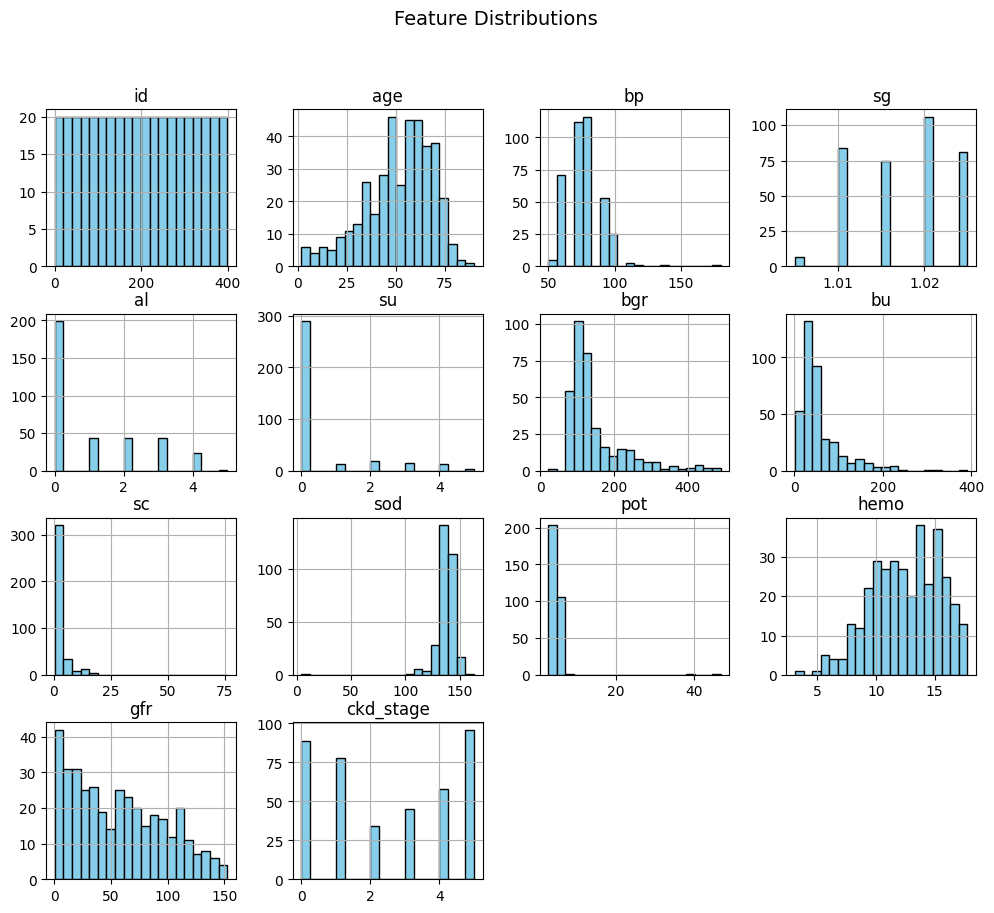

In [7]:
# Plot distributions of numerical features
df[numerical_features].hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()


 feature distribution plots reveal several key insights:  

1️⃣ **Outliers & Skewness**  
   - **Blood Glucose (`bgr`)**, **Serum Creatinine (`sc`)**, **Potassium (`pot`)**: Highly skewed with extreme values.  
   - **Albumin (`al`)**, **Sugar (`su`)**: Majority are **zero**, with discrete spikes.  

2️⃣ **Bimodal & Discrete Distributions**  
   - **Specific Gravity (`sg`)**: Appears bimodal, suggesting distinct patient groups.  
   - **CKD Stage (`ckd_stage`)**: Shows categorical behavior.  

3️⃣ **Normally Distributed Features**  
   - **Age (`age`)**, **Hemoglobin (`hemo`)**: Approximate normal distributions.  

### **Next Steps:**  
✔ Apply transformations (log, box-cox) to skewed variables (`bgr`, `sc`, `pot`).  
✔ Investigate outliers in `sc`, `bgr`, and `pot` to check for data errors.  
✔ Treat `al` and `su` as categorical rather than numerical.* 


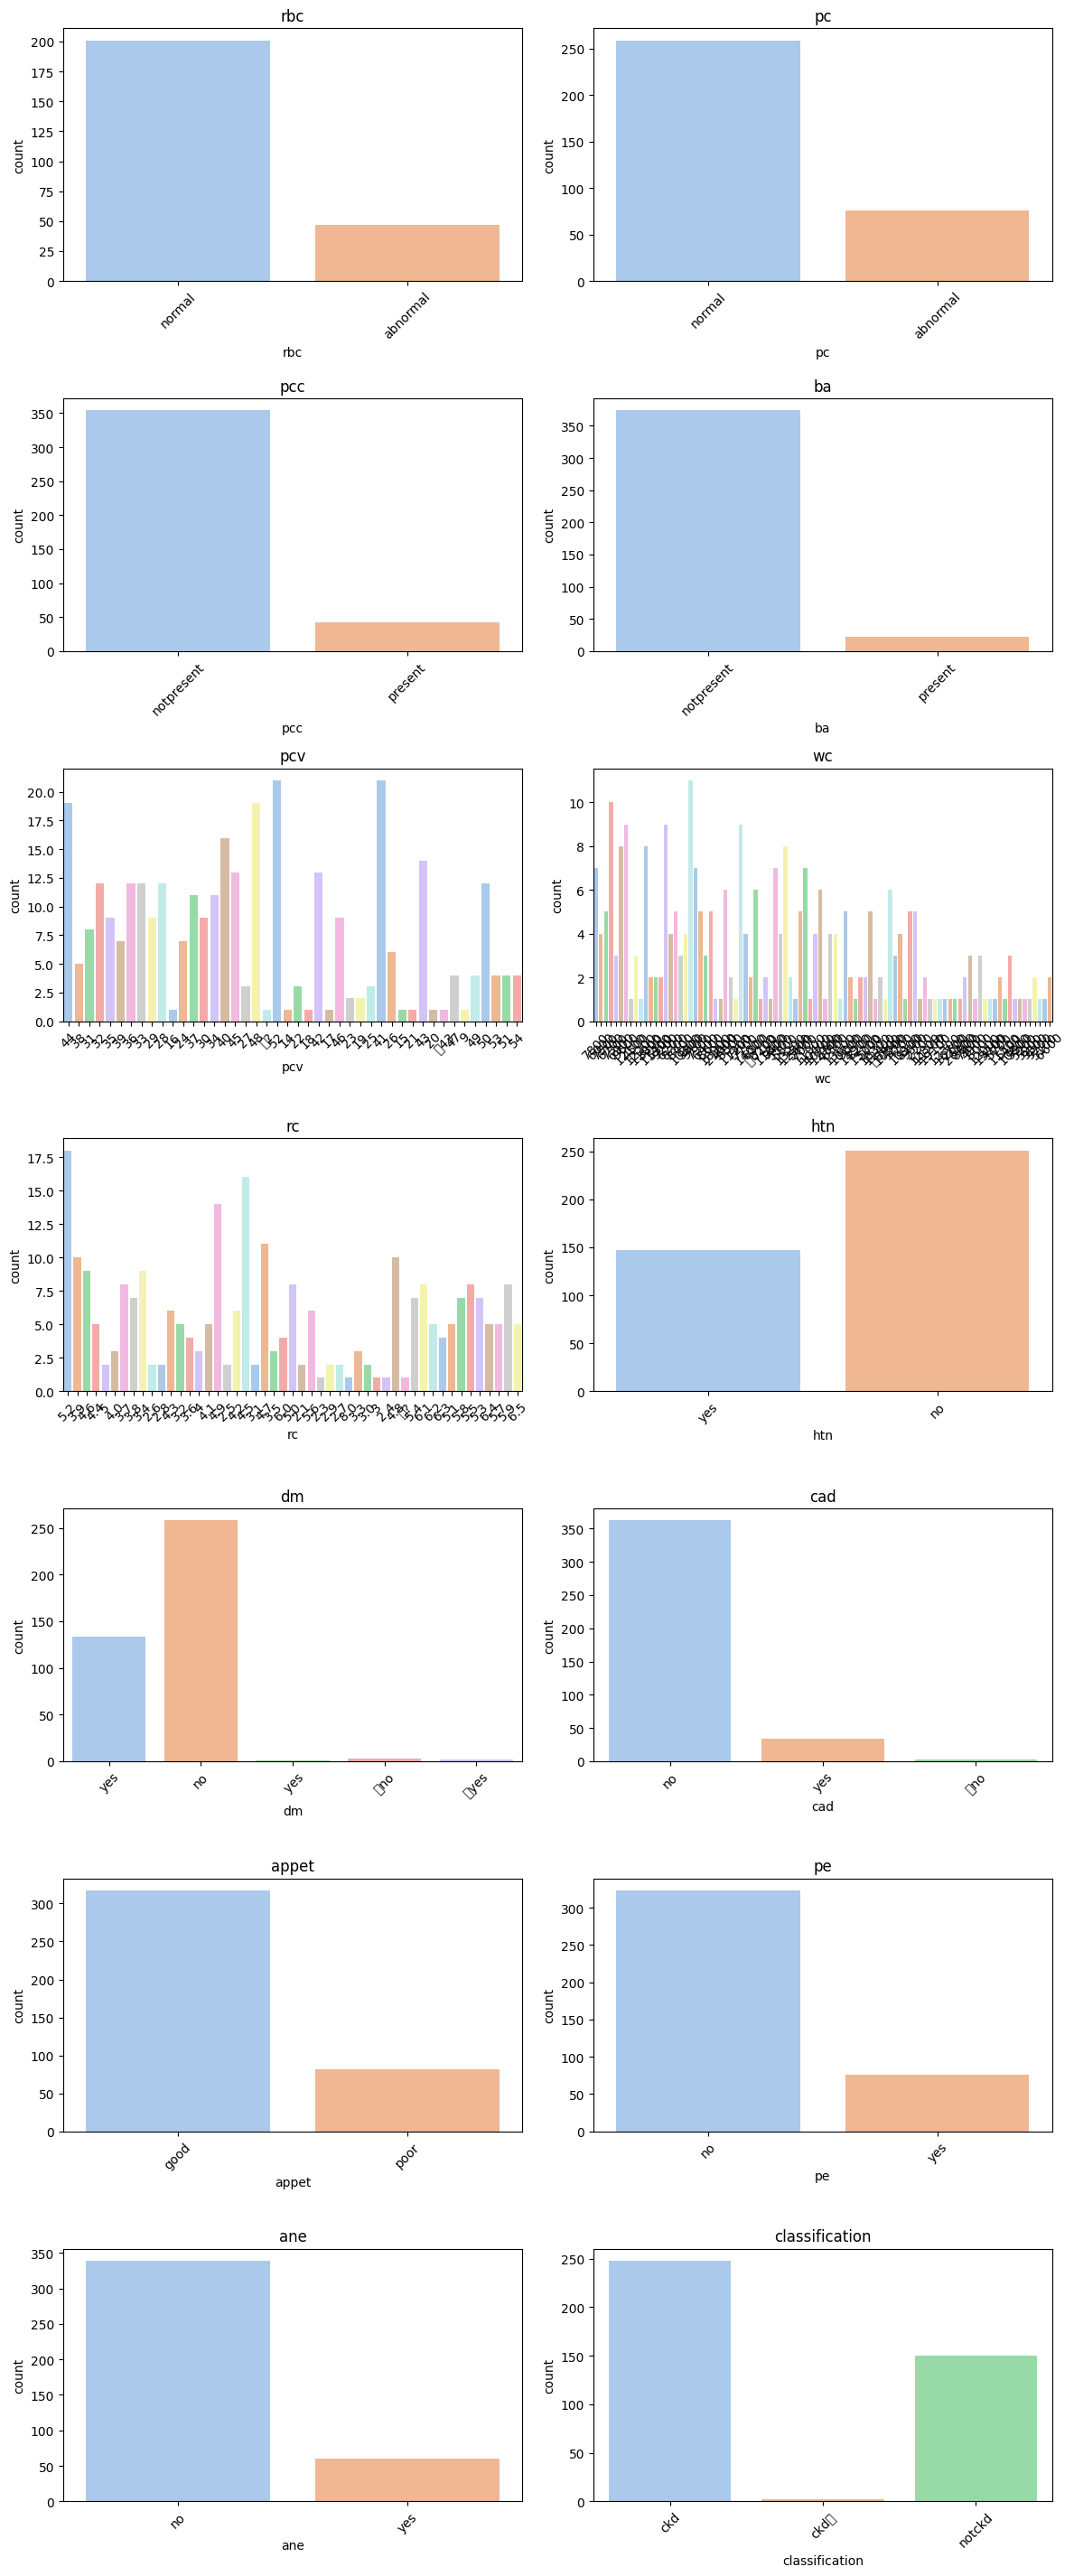

In [8]:
# Visualizing categorical features
plt.figure(figsize=(12, 32))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(8, 2, i)
    sns.countplot(x=df[col], palette="pastel")
    plt.title(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Your categorical feature distributions provide key observations:  

1️⃣ **Imbalanced Features**  
   - Red Blood Cells (`rbc`), Pus Cells (`pc`), Pus Cell Clumps (`pcc`), and Bacteria (`ba`):  
     - Majority of values are , indicating `imbalance`.  
   - Diabetes Mellitus (`dm`), Coronary Artery Disease (`cad`), Pedal Edema (`pe`), Anemia (`ane`):  
     - "No" dominates over "Yes".  

2️⃣ **Potential Data Issues**  
   - Diabetes Mellitus (`dm`) and Coronary Artery Disease (`cad`) contain inconsistent labels which need **cleaning**.  

3️⃣ **Classification Target (`classification`)**  
   - CKD cases outnumber Non-CKD cases**, but old CKD cases are extremely rare.  
   - merging "ckd" and "old ckd" into one class** for better model training.  

### **Next Steps:**  
✔ Clean categorical inconsistencies in `dm`, `cad` (e.g., "yes", "Yes", "y").  
✔ Balance categories where possible (e.g., via oversampling or SMOTE).  
✔ Consider re-grouping rare categories (`classification`).  


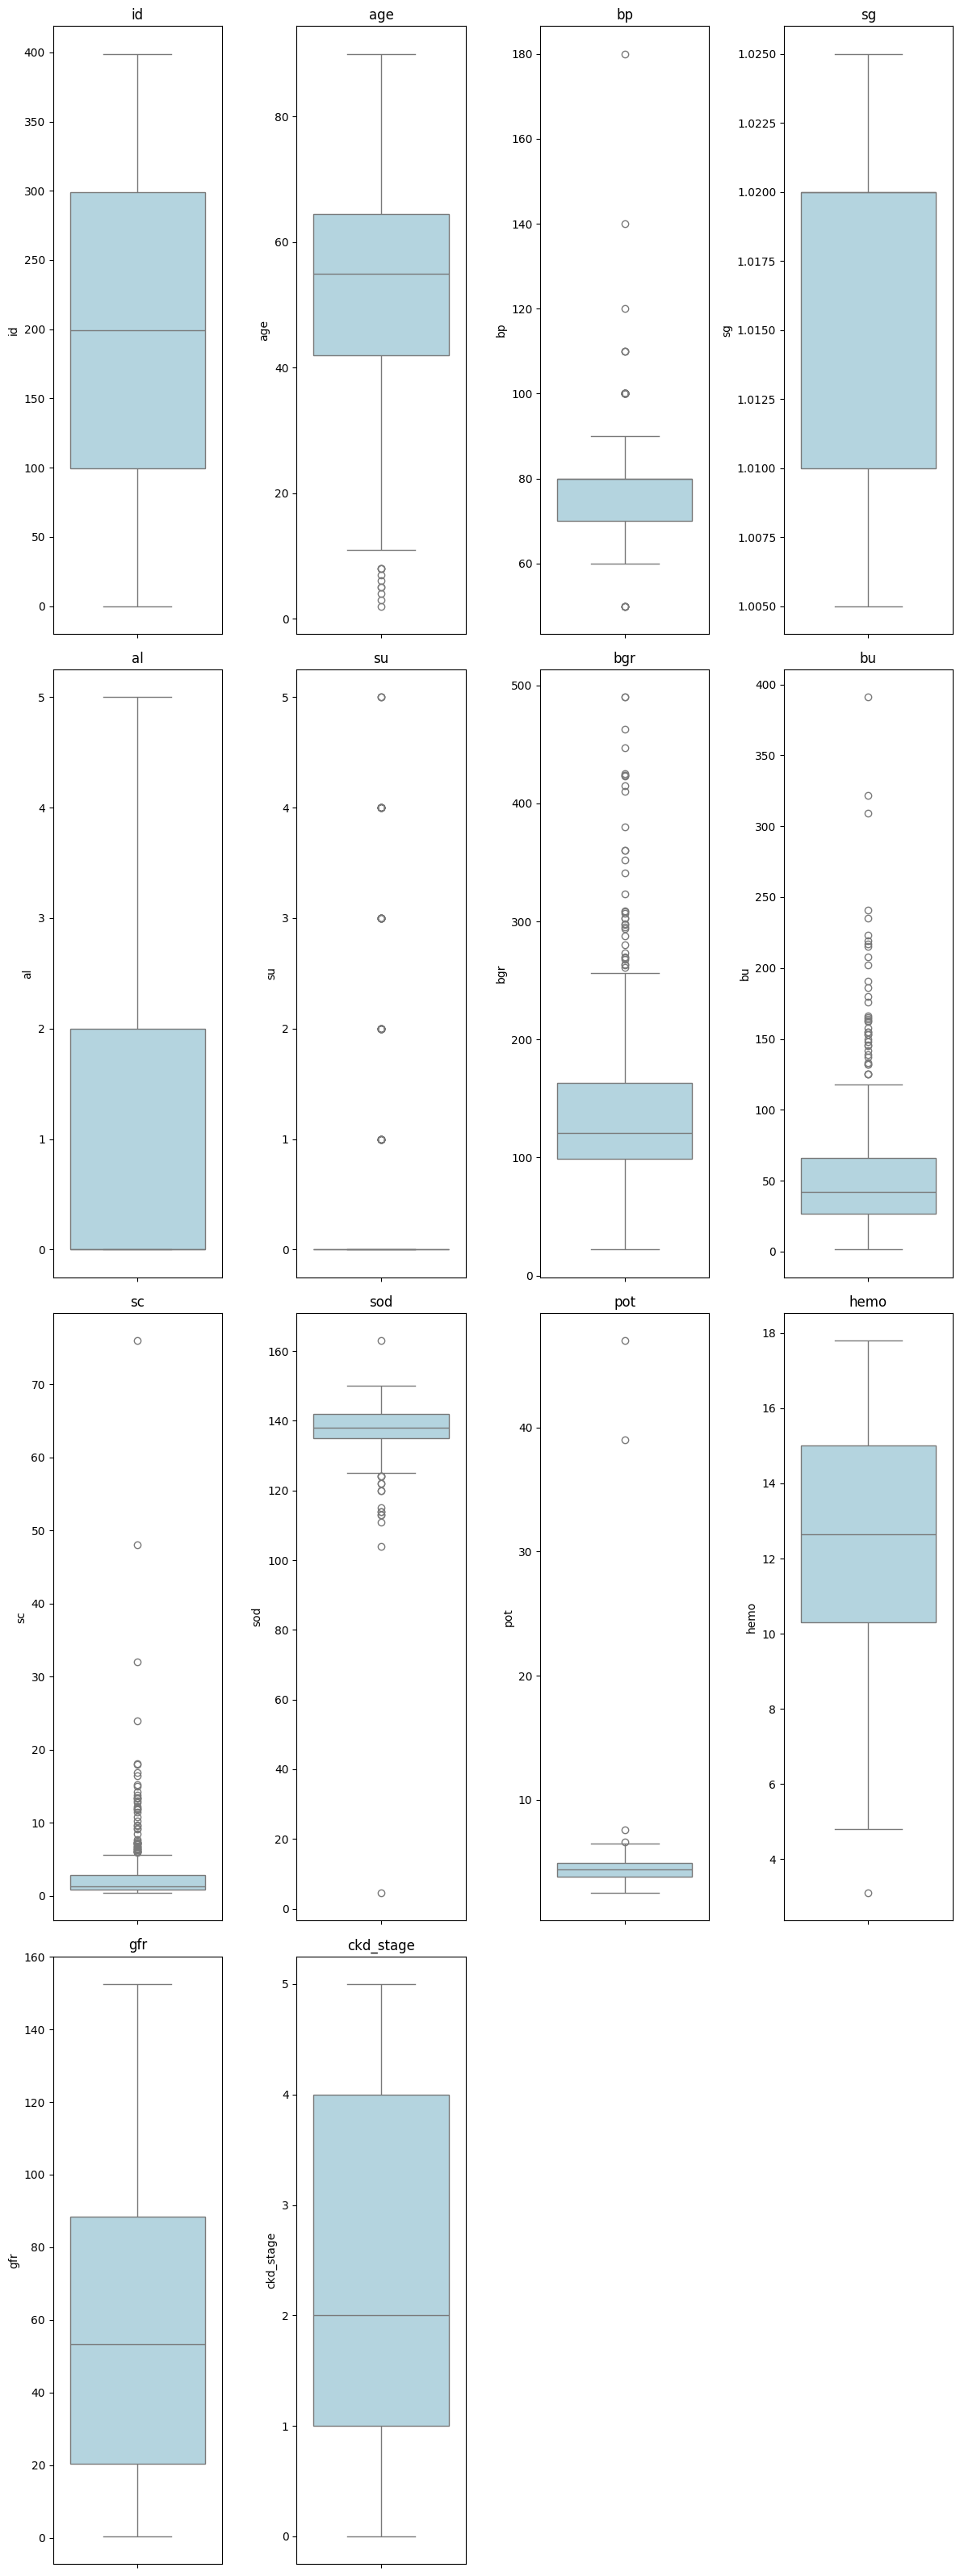

In [9]:
# outlier detection

plt.figure(figsize=(12, 32))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df[col], color="lightblue")
    plt.title(col)
plt.tight_layout()
plt.show()


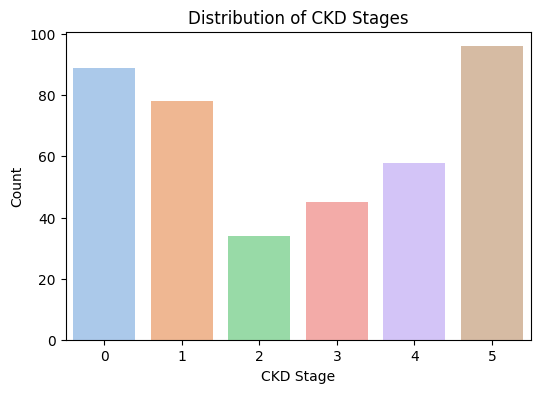

In [10]:
#  Checking Class Imbalance in Target Variable (stage)
plt.figure(figsize=(6,4))
sns.countplot(x=df["ckd_stage"], palette="pastel")
plt.title("Distribution of CKD Stages")
plt.xlabel("CKD Stage")
plt.ylabel("Count")
plt.show()


### Data Cleaning

In [11]:
df_copy = df.copy()
df_copy

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,rc,htn,dm,cad,appet,pe,ane,classification,gfr,ckd_stage
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,5.2,yes,yes,no,good,no,no,ckd,61.643701,1
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,NaN,no,no,no,good,no,no,ckd,134.234408,0
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,NaN,no,yes,no,poor,no,yes,ckd,34.220303,3
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,3.9,yes,no,no,poor,yes,yes,ckd,15.298909,4
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,4.6,no,no,no,good,no,no,ckd,50.095393,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,4.9,no,no,no,good,no,no,notckd,114.012422,0
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,6.2,no,no,no,good,no,no,notckd,64.297371,1
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,5.4,no,no,no,good,no,no,notckd,144.157561,0
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,5.9,no,no,no,good,no,no,notckd,95.541517,0


In [12]:
# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Convert object-based numerical features to float64
num_obj_cols = ["pcv", "wc", "rc"]  # Ensure these are actually object-based numbers
for col in num_obj_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to float64

# Impute missing values
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())  # Mean for numerical
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])  # Mode for categorical



print("Missing values handled, and object-based numerical features converted.")


Missing values handled, and object-based numerical features converted.


In [13]:
# Define columns with potential outliers
outlier_cols = ["bgr", "sc", "pot", "age"]

# Function to handle outliers using IQR (Capping method)
def handle_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)  # First quartile (25th percentile)
        Q3 = df[col].quantile(0.75)  # Third quartile (75th percentile)
        IQR = Q3 - Q1  # Interquartile range

        # Define upper and lower bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap the outliers instead of removing them
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

    return df

# Apply outlier handling
df = handle_outliers(df, outlier_cols)



print("Outliers handled using the IQR capping method.")


Outliers handled using the IQR capping method.


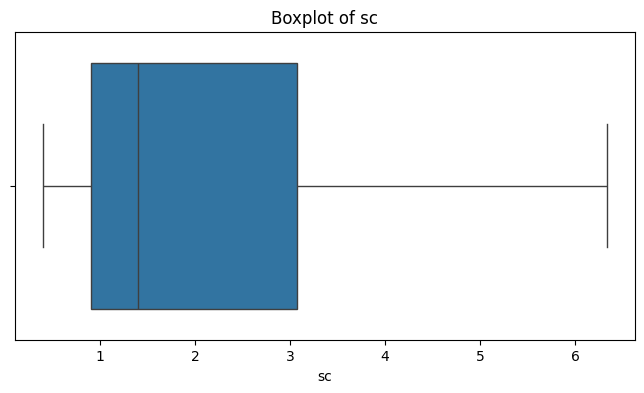

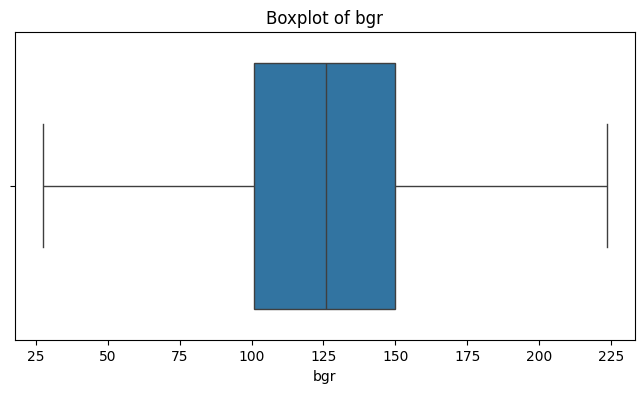

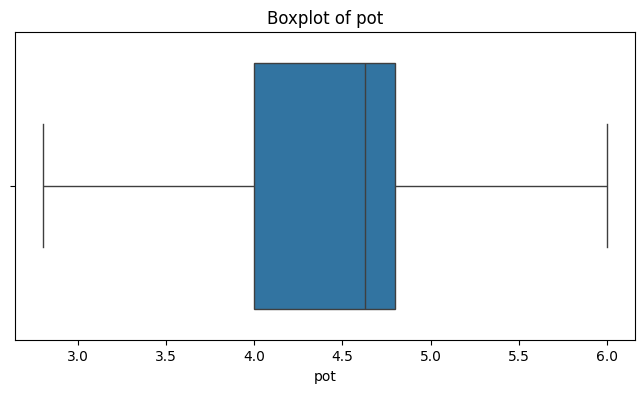

               sc         bgr         pot
count  400.000000  400.000000  400.000000
mean     2.254129  136.985267    4.432744
std      1.861203   46.028992    0.643583
min      0.400000   27.500000    2.800000
25%      0.900000  101.000000    4.000000
50%      1.400000  126.000000    4.627244
75%      3.072454  150.000000    4.800000
max      6.331136  223.500000    6.000000
Skewed features transformed, outliers investigated, and categorical conversion completed.


In [14]:
### Step 1: Treat 'al' and 'su' as categorical
df["al"] = df["al"].astype("category")
df["su"] = df["su"].astype("category")

### Step 2: Investigate Outliers in 'sc', 'bgr', 'pot'
def plot_outliers(df, cols):
    for col in cols:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df[col])
        plt.title(f"Boxplot of {col}")
        plt.show()

# Visualize outliers
plot_outliers(df, ["sc", "bgr", "pot"])

# Check extreme values
print(df[["sc", "bgr", "pot"]].describe())

### Step 3: Handle Skewed Features using Log and Box-Cox
skewed_cols = ["bgr", "sc", "pot"]

# Apply transformations
for col in skewed_cols:
    if (df[col] > 0).all():  # If all values are positive, use Box-Cox
        df[col], _ = stats.boxcox(df[col])
    else:  # Use log transformation if there are zeros
        df[col] = np.log1p(df[col])



print("Skewed features transformed, outliers investigated, and categorical conversion completed.")


In [15]:
df.head(20)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,rc,htn,dm,cad,appet,pe,ane,classification,gfr,ckd_stage
0,0,48.0,80.000000,1.020000,1.000000,0.000000,normal,normal,notpresent,notpresent,...,5.2,yes,yes,no,good,no,no,ckd,61.643701,1
1,1,9.0,50.000000,1.020000,4.000000,0.000000,normal,normal,notpresent,notpresent,...,5.2,no,no,no,good,no,no,ckd,134.234408,0
2,2,62.0,80.000000,1.010000,2.000000,3.000000,normal,normal,notpresent,notpresent,...,5.2,no,yes,no,poor,no,yes,ckd,34.220303,3
3,3,48.0,70.000000,1.005000,4.000000,0.000000,normal,abnormal,present,notpresent,...,3.9,yes,no,no,poor,yes,yes,ckd,15.298909,4
4,4,51.0,80.000000,1.010000,2.000000,0.000000,normal,normal,notpresent,notpresent,...,4.6,no,no,no,good,no,no,ckd,50.095393,2
5,5,60.0,90.000000,1.015000,3.000000,0.000000,normal,normal,notpresent,notpresent,...,4.4,yes,yes,no,good,yes,no,ckd,62.945699,1
6,6,68.0,70.000000,1.010000,0.000000,0.000000,normal,normal,notpresent,notpresent,...,5.2,no,no,no,good,no,no,ckd,1.431952,5
7,7,24.0,76.469072,1.015000,2.000000,4.000000,normal,abnormal,notpresent,notpresent,...,5.0,no,yes,no,good,yes,no,ckd,81.057483,1
8,8,52.0,100.000000,1.015000,3.000000,0.000000,normal,abnormal,present,notpresent,...,4.0,yes,yes,no,good,no,yes,ckd,34.387668,3
9,9,53.0,90.000000,1.020000,2.000000,0.000000,abnormal,abnormal,present,notpresent,...,3.7,yes,yes,no,poor,no,yes,ckd,6.821032,5


In [16]:
print("Categorical features:", df.select_dtypes(include=['object']).columns)
print("Numerical features:", df.select_dtypes(include=['number']).columns)


Categorical features: Index(['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
       'classification'],
      dtype='object')
Numerical features: Index(['id', 'age', 'bp', 'sg', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv',
       'wc', 'rc', 'gfr', 'ckd_stage'],
      dtype='object')


In [17]:
# Save categorical and numerical features into a df
feature_types = pd.DataFrame({
    'feature': df.columns,
    'type': [df[col].dtype for col in df.columns]
})
feature_types['categorical'] = feature_types['feature'].apply(lambda x: x in df.select_dtypes(include=['object']).columns)
feature_types['numerical'] = feature_types['feature'].apply(lambda x: x in df.select_dtypes(include=['number']).columns)


In [18]:
feature_types


,feature,type,categorical,numerical
0,id,int64,False,True
1,age,float64,False,True
2,bp,float64,False,True
3,sg,float64,False,True
4,al,category,False,False
5,su,category,False,False
6,rbc,object,True,False
7,pc,object,True,False
8,pcc,object,True,False
9,ba,object,True,False


In [19]:
categorical_columns = df.select_dtypes(include=['object', 'category'])
categorical_columns

,al,su,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
0,1.0,0.0,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,4.0,0.0,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,2.0,3.0,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,4.0,0.0,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,2.0,0.0,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.0,0.0,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
396,0.0,0.0,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
397,0.0,0.0,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
398,0.0,0.0,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd


In [20]:

# Remove decimal points (convert to integers) for columns 'al' and 'su'
df['al'] = df['al'].astype(int)
df['su'] = df['su'].astype(int)


# Display the updated DataFrame
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,rc,htn,dm,cad,appet,pe,ane,classification,gfr,ckd_stage
0,0,48.0,80.0,1.020,1,0,normal,normal,notpresent,notpresent,...,5.2,yes,yes,no,good,no,no,ckd,61.643701,1
1,1,9.0,50.0,1.020,4,0,normal,normal,notpresent,notpresent,...,5.2,no,no,no,good,no,no,ckd,134.234408,0
2,2,62.0,80.0,1.010,2,3,normal,normal,notpresent,notpresent,...,5.2,no,yes,no,poor,no,yes,ckd,34.220303,3
3,3,48.0,70.0,1.005,4,0,normal,abnormal,present,notpresent,...,3.9,yes,no,no,poor,yes,yes,ckd,15.298909,4
4,4,51.0,80.0,1.010,2,0,normal,normal,notpresent,notpresent,...,4.6,no,no,no,good,no,no,ckd,50.095393,2


In [21]:
df['ckd_stage'].unique()

array([1, 0, 3, 4, 2, 5], dtype=int64)

In [22]:
df['gfr'].unique()

array([ 61.64370142, 134.23440809,  34.22030334,  15.29890918,
        50.09539266,  62.94569895,   1.43195185,  81.05748311,
        34.387668  ,   6.82103203,  14.17838621,  20.81319587,
        27.22956336,  10.55187374,  12.12685324,   5.27787288,
        29.831876  ,  10.54439202,  51.43423724,  39.45729007,
        13.53199894,   0.37592931,   6.5140569 ,  56.59061184,
        53.36475853,  32.28092432,  22.05835658,  19.95419731,
        42.32332204,  44.45647351,  39.48714322,  42.96004553,
        23.32922685,   8.97127685,  29.49923777,  31.01511058,
        14.78573056,  12.04196527,  13.78273077,  31.78024276,
       107.99218177,  77.38728068,   4.74099267,   7.95997312,
         8.61696331, 130.51512574,  73.22693442,  18.71415489,
        17.84424156,  41.73815684,  28.60066006,  69.64794609,
        15.75068882,   4.04753643,   5.70742817,  10.18769251,
         7.54030615,  16.47890053,   1.01842308, 141.15139435,
         8.7550084 ,  70.43330772,  38.09548413,  16.10

In [23]:
# Round the 'gfr' column to two decimal places
df['gfr'] = df['gfr'].round(1)
df['gfr'].unique()


array([ 61.6, 134.2,  34.2,  15.3,  50.1,  62.9,   1.4,  81.1,  34.4,
         6.8,  14.2,  20.8,  27.2,  10.6,  12.1,   5.3,  29.8,  10.5,
        51.4,  39.5,  13.5,   0.4,   6.5,  56.6,  53.4,  32.3,  22.1,
        20. ,  42.3,  44.5,  43. ,  23.3,   9. ,  29.5,  31. ,  14.8,
        12. ,  13.8,  31.8, 108. ,  77.4,   4.7,   8. ,   8.6, 130.5,
        73.2,  18.7,  17.8,  41.7,  28.6,  69.6,  15.8,   4. ,   5.7,
        10.2,   7.5,  16.5,   1. , 141.2,   8.8,  70.4,  38.1,  16.1,
        79.9,  96.5,  18.4,  50. ,   7.3, 143. ,   5.8,  35.7,  37.9,
        76.8,   2.7,  40.3,  33.4,  18.2,  27.6,  50.4,  16.9,  38.2,
        13.9,  38.6,  62.1,  21.3,  26.3,   7.9,  58.3,  96.3,  10.9,
        39. ,   3.8,  31.6,   3.6,   8.5,  21.1,  78.5,  33.9,  29.9,
        11.4,  48.6,  87.9,  58.7,  56.7,  25. ,  53.6,   4.1,  70.9,
        22.5,  21.4,  12.3,   8.7,   9.3,   5.2, 151.4,   3.2,   2.5,
        56. ,  22.4,  14.7,  36.5,  23.2,  53.2,   7.7,   6.1,  25.8,
        74.2,  37.2,

In [24]:
df['classification'].unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [25]:
# Strip leading/trailing whitespaces or tabs
df['classification'] = df['classification'].str.strip()

# Optionally, standardize to 'ckd' and 'notckd'
df['classification'] = df['classification'].replace({'ckd\t': 'ckd'})
df['classification'].unique()

array(['ckd', 'notckd'], dtype=object)

In [26]:

df['ane'].unique()

array(['no', 'yes'], dtype=object)

In [27]:
df['pe'].unique()

array(['no', 'yes'], dtype=object)

In [28]:
df['appet'].unique()

array(['good', 'poor'], dtype=object)

In [29]:
df['cad'].unique()

array(['no', 'yes', '\tno'], dtype=object)

In [30]:
# Strip leading/trailing whitespaces and normalize to 'yes' or 'no'
df['cad'] = df['cad'].str.strip()  # Remove leading/trailing spaces/tabs
df['cad'] = df['cad'].replace({'yes': 'yes', ' no': 'no', 'yes ': 'yes', '\tno': 'no', '\tyes': 'yes'})
df['cad'].unique()

array(['no', 'yes'], dtype=object)

In [31]:
df['dm'].unique()

array(['yes', 'no', ' yes', '\tno', '\tyes'], dtype=object)

In [32]:
# Strip leading/trailing whitespaces and normalize to 'yes' or 'no'
df['dm'] = df['dm'].str.strip()  # Remove leading/trailing spaces/tabs
df['dm'] = df['dm'].replace({'yes': 'yes', ' no': 'no', 'yes ': 'yes', '\tno': 'no', '\tyes': 'yes'})
df['dm'].unique()


array(['yes', 'no'], dtype=object)

In [33]:
df['htn'].unique()

array(['yes', 'no'], dtype=object)

In [34]:
df['rc'].unique()

array([5.2, 3.9, 4.6, 4.4, 5. , 4. , 3.7, 3.8, 3.4, 2.6, 2.8, 4.3, 3.2,
       3.6, 4.1, 4.9, 2.5, 4.2, 4.5, 3.1, 4.7, 3.5, 6. , 2.1, 5.6, 2.3,
       2.9, 2.7, 8. , 3.3, 3. , 2.4, 4.8, 5.4, 6.1, 6.2, 6.3, 5.1, 5.8,
       5.5, 5.3, 6.4, 5.7, 5.9, 6.5])

In [35]:
df['wc'].unique()

array([ 7800.,  6000.,  7500.,  6700.,  7300.,  9800.,  6900.,  9600.,
       12100.,  4500., 12200., 11000.,  3800., 11400.,  5300.,  9200.,
        6200.,  8300.,  8400., 10300.,  9100.,  7900.,  6400.,  8600.,
       18900., 21600.,  4300.,  8500., 11300.,  7200.,  7700., 14600.,
        6300.,  7100., 11800.,  9400.,  5500.,  5800., 13200., 12500.,
        5600.,  7000., 11900., 10400., 10700., 12700.,  6800.,  6500.,
       13600., 10200.,  9000., 14900.,  8200., 15200.,  5000., 16300.,
       12400., 10500.,  4200.,  4700., 10900.,  8100.,  9500.,  2200.,
       12800., 11200., 19100., 12300., 16700.,  2600., 26400.,  8800.,
        7400.,  4900.,  8000., 12000., 15700.,  4100.,  5700., 11500.,
        5400., 10800.,  9900.,  5200.,  5900.,  9300.,  9700.,  5100.,
        6600.])

In [36]:
df['pcv'].unique()

array([44., 38., 31., 32., 35., 39., 36., 33., 29., 28., 41., 16., 24.,
       37., 30., 34., 40., 45., 27., 48., 52., 14., 22., 18., 42., 17.,
       46., 23., 19., 25., 26., 15., 21., 43., 20., 47.,  9., 49., 50.,
       53., 51., 54.])

In [37]:
df['hemo'].unique()

array([15.4       , 11.3       ,  9.6       , 11.2       , 11.6       ,
       12.2       , 12.4       , 10.8       ,  9.5       ,  9.4       ,
        9.7       ,  9.8       ,  5.6       ,  7.6       , 12.6       ,
       12.1       , 12.7       , 10.3       ,  7.7       , 10.9       ,
       12.52643678, 11.1       ,  9.9       , 12.5       , 12.9       ,
       10.1       , 12.        , 13.        ,  7.9       ,  9.3       ,
       15.        , 10.        ,  8.6       , 13.6       , 10.2       ,
       10.5       ,  6.6       , 11.        ,  7.5       , 15.6       ,
       15.2       ,  4.8       ,  9.1       ,  8.1       , 11.9       ,
       13.5       ,  8.3       ,  7.1       , 16.1       , 10.4       ,
        9.2       ,  6.2       , 13.9       , 14.1       ,  6.        ,
       11.8       , 11.7       , 11.4       , 14.        ,  8.2       ,
       13.2       ,  6.1       ,  8.        , 12.3       ,  8.4       ,
       14.3       ,  9.        ,  8.7       , 10.6       , 13.1 

In [38]:
df['hemo'] = df['hemo'].abs().round(1)
df['hemo'].unique()

array([15.4, 11.3,  9.6, 11.2, 11.6, 12.2, 12.4, 10.8,  9.5,  9.4,  9.7,
        9.8,  5.6,  7.6, 12.6, 12.1, 12.7, 10.3,  7.7, 10.9, 12.5, 11.1,
        9.9, 12.9, 10.1, 12. , 13. ,  7.9,  9.3, 15. , 10. ,  8.6, 13.6,
       10.2, 10.5,  6.6, 11. ,  7.5, 15.6, 15.2,  4.8,  9.1,  8.1, 11.9,
       13.5,  8.3,  7.1, 16.1, 10.4,  9.2,  6.2, 13.9, 14.1,  6. , 11.8,
       11.7, 11.4, 14. ,  8.2, 13.2,  6.1,  8. , 12.3,  8.4, 14.3,  9. ,
        8.7, 10.6, 13.1, 10.7,  5.5,  5.8,  6.8,  8.8,  8.5, 13.8, 11.5,
        7.3, 13.7, 12.8, 13.4,  6.3,  3.1, 17. , 15.9, 14.5, 15.5, 16.2,
       14.4, 14.2, 16.3, 14.8, 16.5, 15.7, 13.3, 14.6, 16.4, 16.9, 16. ,
       14.7, 16.6, 14.9, 16.7, 16.8, 15.8, 15.1, 17.1, 17.2, 15.3, 17.3,
       17.4, 17.7, 17.8, 17.5, 17.6])

In [39]:
df['pot'].unique()

array([4.26402373, 1.99251989, 2.47300293, 3.46348975, 3.08777537,
       3.7166164 , 5.80862971, 2.71711811, 6.07761773, 4.61798763,
       3.58979535, 3.84394266, 5.01111917, 3.21246827, 4.22885664,
       3.33771032, 4.35810962, 5.94293341, 4.48782262, 3.97176433,
       5.40805785, 4.74859696, 2.84008698, 2.96364396, 2.11162774,
       4.10007199, 5.6747121 , 5.27533305, 5.14301801, 4.87964319,
       5.54118621, 2.23142344, 2.5947517 ])

In [40]:
df['pot'] = df['pot'].abs().round(1)
df['pot'].unique()

array([4.3, 2. , 2.5, 3.5, 3.1, 3.7, 5.8, 2.7, 6.1, 4.6, 3.6, 3.8, 5. ,
       3.2, 4.2, 3.3, 4.4, 5.9, 4.5, 4. , 5.4, 4.7, 2.8, 3. , 2.1, 4.1,
       5.7, 5.3, 5.1, 4.9, 5.5, 2.2, 2.6])

In [41]:
df['sod'].unique()

array([137.52875399, 111.        , 142.        , 104.        ,
       114.        , 131.        , 138.        , 135.        ,
       130.        , 141.        , 139.        ,   4.5       ,
       136.        , 129.        , 140.        , 132.        ,
       133.        , 134.        , 125.        , 163.        ,
       137.        , 128.        , 143.        , 127.        ,
       146.        , 126.        , 122.        , 147.        ,
       124.        , 115.        , 145.        , 113.        ,
       120.        , 150.        , 144.        ])

In [42]:
df['sod'] = df['sod'].abs().round(1)
df['sod'].unique()

array([137.5, 111. , 142. , 104. , 114. , 131. , 138. , 135. , 130. ,
       141. , 139. ,   4.5, 136. , 129. , 140. , 132. , 133. , 134. ,
       125. , 163. , 137. , 128. , 143. , 127. , 146. , 126. , 122. ,
       147. , 124. , 115. , 145. , 113. , 120. , 150. , 144. ])

In [43]:
df['sc'].unique()

array([ 0.17824427, -0.22946032,  0.54678998,  1.13575483,  0.32276039,
        0.09418792,  1.47952878,  0.59318161,  1.1723058 ,  0.87993791,
        0.67742573,  1.26956127,  1.18973565,  0.7158743 ,  1.35213281,
        0.25397651,  0.443539  ,  1.15432299,  0.97923778,  0.7866039 ,
        0.38566557,  0.81926266,  0.63661944,  1.05487451, -0.37299582,
        0.        ,  1.4764134 ,  1.43459492, -0.10675498,  0.96113951,
        1.02142   ,  1.00983737, -0.54474142,  1.45593236,  1.03278216,
        0.90820766,  0.93524363,  0.49706196,  1.09671838,  1.40083495,
        1.23899516, -0.75657016,  1.36473682,  1.4453747 ,  0.75219962,
        0.85032915,  1.22305376, -1.02926499])

In [44]:
# Approximate to two decimal places and make negatives positive (absolute values)
df['sc'] = df['sc'].abs().round(2)
df['sc'] = df['sc'].replace(0, 0.01) 
df['sc'].unique()

array([0.18, 0.23, 0.55, 1.14, 0.32, 0.09, 1.48, 0.59, 1.17, 0.88, 0.68,
       1.27, 1.19, 0.72, 1.35, 0.25, 0.44, 1.15, 0.98, 0.79, 0.39, 0.82,
       0.64, 1.05, 0.37, 0.01, 1.43, 0.11, 0.96, 1.02, 1.01, 0.54, 1.46,
       1.03, 0.91, 0.94, 0.5 , 1.1 , 1.4 , 1.24, 0.76, 1.36, 1.45, 0.75,
       0.85, 1.22])

In [45]:
df['bgr'].unique()

array([4.58329592, 4.76700799, 5.14009489, 4.55260384, 4.46234487,
       4.13238441, 4.40899835, 4.70313375, 4.08116086, 5.07521304,
       4.39048849, 4.8204278 , 4.1569476 , 4.39979105, 4.52887466,
       4.90848293, 4.36198915, 4.47944541, 4.81462427, 4.59825641,
       4.34247539, 4.47093585, 4.83192271, 4.71623188, 4.89794074,
       4.33255754, 4.69651196, 5.05766861, 4.192584  , 5.07085937,
       4.60564395, 4.74186557, 4.32252922, 4.84889171, 4.72270962,
       4.95443489, 4.27064131, 4.77898656, 4.75441159, 4.51269898,
       4.85447696, 4.6416938 , 4.66952296, 4.42713475, 4.82619379,
       4.86554345, 4.66264644, 4.44491232, 4.62744765, 4.88727213,
       4.48787504, 5.08385675, 5.12174276, 4.35228516, 4.90322745,
       4.4181123 , 4.79698344, 4.29175637, 4.73552581, 4.53685438,
       4.30213123, 4.61297102, 4.31238797, 4.56037598, 4.63459908,
       4.59080741, 5.10089529, 5.09666627, 4.2490198 , 4.45367089,
       4.70970683, 4.18086073, 4.76678368, 4.83761503, 5.00285

In [46]:
# Round the 'bgr' column to two decimal places
df['bgr'] = df['bgr'].round(2)
df['bgr'].unique()

array([4.58, 4.77, 5.14, 4.55, 4.46, 4.13, 4.41, 4.7 , 4.08, 5.08, 4.39,
       4.82, 4.16, 4.4 , 4.53, 4.91, 4.36, 4.48, 4.81, 4.6 , 4.34, 4.47,
       4.83, 4.72, 4.9 , 4.33, 5.06, 4.19, 5.07, 4.61, 4.74, 4.32, 4.85,
       4.95, 4.27, 4.78, 4.75, 4.51, 4.64, 4.67, 4.43, 4.87, 4.66, 4.44,
       4.63, 4.89, 4.49, 5.12, 4.35, 4.42, 4.8 , 4.29, 4.54, 4.3 , 4.31,
       4.56, 4.59, 5.1 , 4.25, 4.45, 4.71, 4.18, 4.84, 5.  , 5.13, 3.21,
       4.5 , 5.11, 4.2 , 4.65, 4.96, 4.52, 5.04, 5.05, 4.92, 4.23, 4.57,
       4.38, 4.37, 4.22, 4.68, 4.26, 4.24, 4.28, 4.14])

In [47]:
df['ba'].unique()

array(['notpresent', 'present'], dtype=object)

In [48]:
df['pcc'].unique()

array(['notpresent', 'present'], dtype=object)

In [49]:
df['pc'].unique()

array(['normal', 'abnormal'], dtype=object)

In [50]:
df['rbc'].unique()

array(['normal', 'abnormal'], dtype=object)

In [51]:
df['su'].unique()

array([0, 3, 4, 1, 2, 5])

In [52]:
df['sg'].unique()

array([1.02      , 1.01      , 1.005     , 1.015     , 1.01740793,
       1.025     ])

In [53]:
df['al'].unique()

array([1, 4, 2, 3, 0, 5])

In [54]:
numerical_columns= df.select_dtypes(include=['number' ])
numerical_columns

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,gfr,ckd_stage
0,0,48.0,80.0,1.020,1,0,4.58,36.0,0.18,137.5,4.3,15.4,44.0,7800.0,5.2,61.6,1
1,1,9.0,50.0,1.020,4,0,4.77,18.0,0.23,137.5,4.3,11.3,38.0,6000.0,5.2,134.2,0
2,2,62.0,80.0,1.010,2,3,5.14,53.0,0.55,137.5,4.3,9.6,31.0,7500.0,5.2,34.2,3
3,3,48.0,70.0,1.005,4,0,4.55,56.0,1.14,111.0,2.0,11.2,32.0,6700.0,3.9,15.3,4
4,4,51.0,80.0,1.010,2,0,4.46,26.0,0.32,137.5,4.3,11.6,35.0,7300.0,4.6,50.1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0,0,4.72,49.0,0.76,150.0,4.6,15.7,47.0,6700.0,4.9,114.0,0
396,396,42.0,70.0,1.025,0,0,4.14,31.0,0.18,141.0,2.8,16.5,54.0,7800.0,6.2,64.3,1
397,397,12.0,80.0,1.020,0,0,4.41,26.0,0.54,137.0,4.0,15.8,49.0,6600.0,5.4,144.2,0
398,398,17.0,60.0,1.025,0,0,4.53,50.0,0.01,135.0,4.6,14.2,51.0,7200.0,5.9,95.5,0


#### Relationship between Categorical features and target variable

Analyzing relationship between 'ckd_stage' and 'rbc':
rbc        abnormal  normal
ckd_stage                  
0                 3      86
1                 3      75
2                 2      32
3                 5      40
4                 8      50
5                26      70
Chi-Square Test p-value: 2.524741654068389e-06



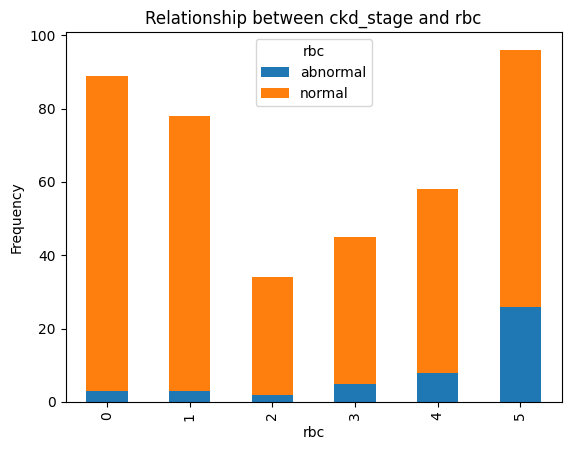

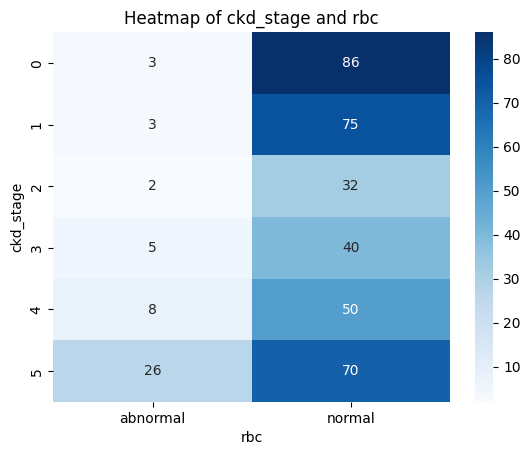

Analyzing relationship between 'ckd_stage' and 'pc':
pc         abnormal  normal
ckd_stage                  
0                 2      87
1                 6      72
2                 7      27
3                11      34
4                14      44
5                36      60
Chi-Square Test p-value: 9.18062074718673e-09



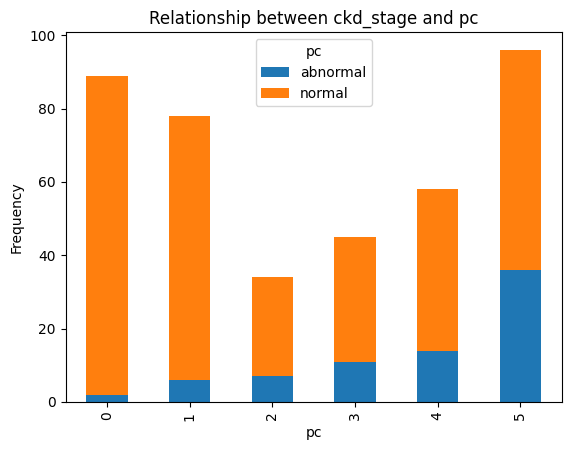

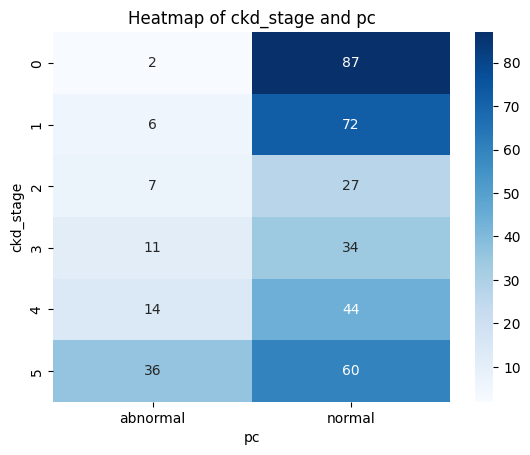

Analyzing relationship between 'ckd_stage' and 'pcc':
pcc        notpresent  present
ckd_stage                     
0                  89        0
1                  77        1
2                  31        3
3                  34       11
4                  46       12
5                  81       15
Chi-Square Test p-value: 9.506309939858811e-07



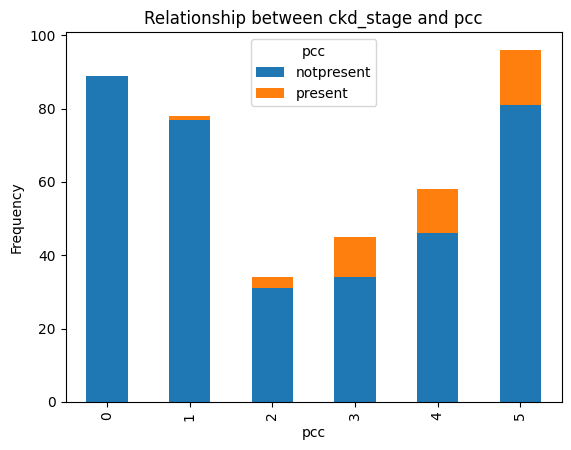

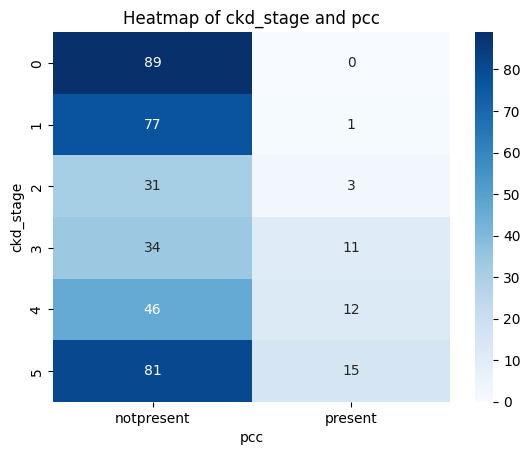

Analyzing relationship between 'ckd_stage' and 'ba':
ba         notpresent  present
ckd_stage                     
0                  88        1
1                  77        1
2                  32        2
3                  43        2
4                  53        5
5                  85       11
Chi-Square Test p-value: 0.017633570875981032



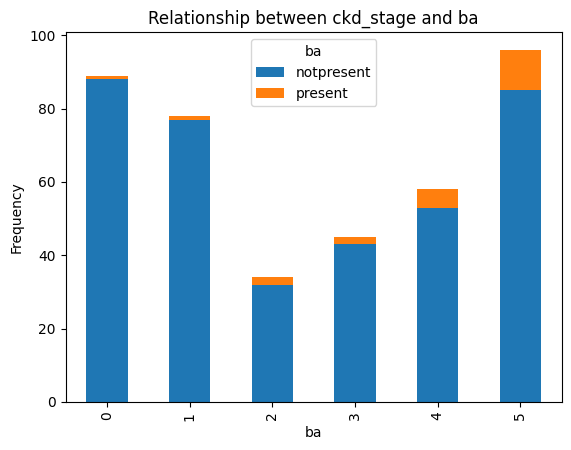

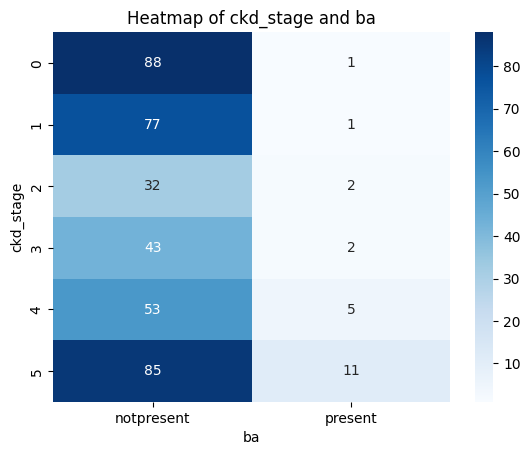

Analyzing relationship between 'ckd_stage' and 'htn':
htn        no  yes
ckd_stage         
0          87    2
1          69    9
2          26    8
3          19   26
4          16   42
5          36   60
Chi-Square Test p-value: 7.222481937428171e-28



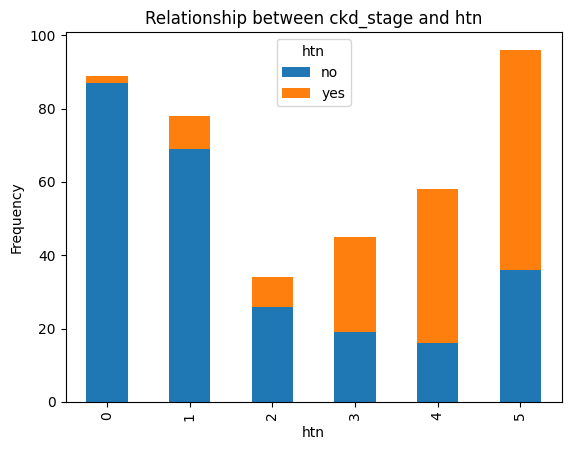

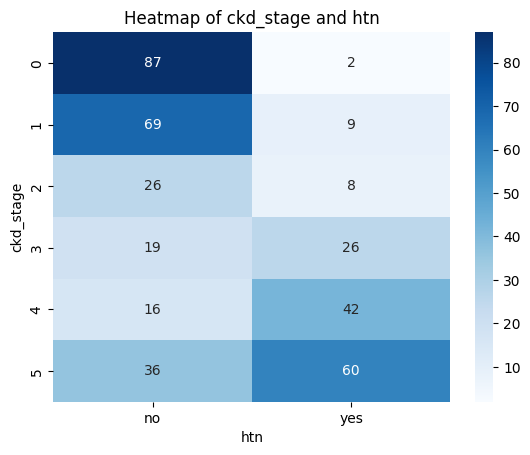

Analyzing relationship between 'ckd_stage' and 'dm':
dm         no  yes
ckd_stage         
0          85    4
1          68   10
2          25    9
3          19   26
4          23   35
5          43   53
Chi-Square Test p-value: 8.034230947799579e-20



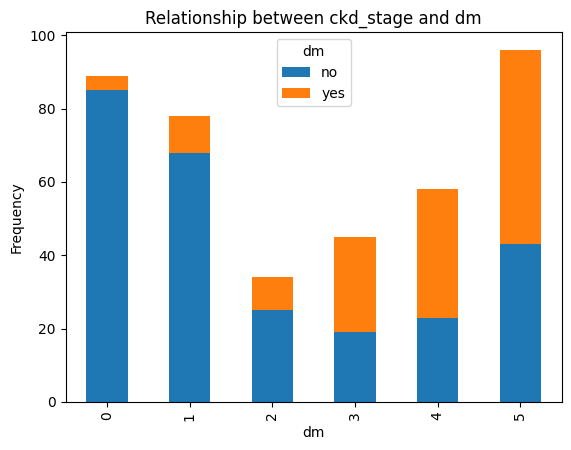

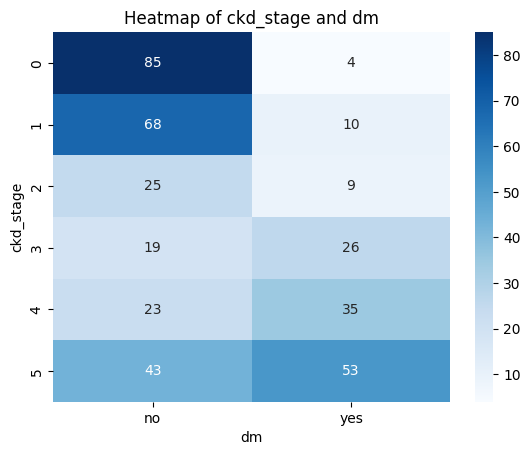

Analyzing relationship between 'ckd_stage' and 'cad':
cad        no  yes
ckd_stage         
0          89    0
1          78    0
2          33    1
3          40    5
4          46   12
5          80   16
Chi-Square Test p-value: 7.296845408252822e-07



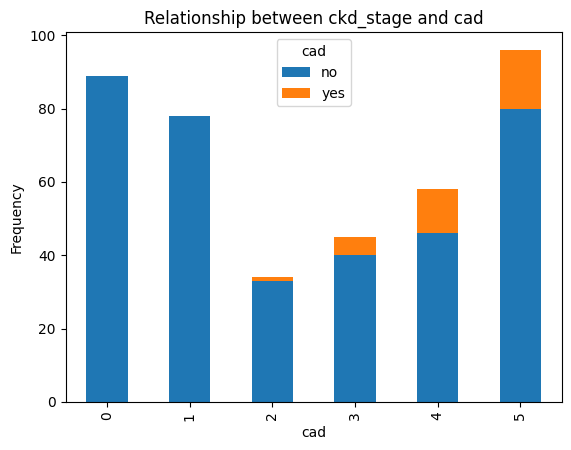

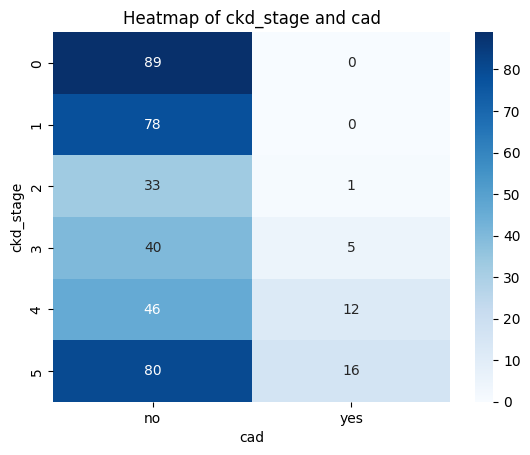

Analyzing relationship between 'ckd_stage' and 'appet':
appet      good  poor
ckd_stage            
0            85     4
1            78     0
2            26     8
3            32    13
4            34    24
5            63    33
Chi-Square Test p-value: 2.7857730893756303e-12



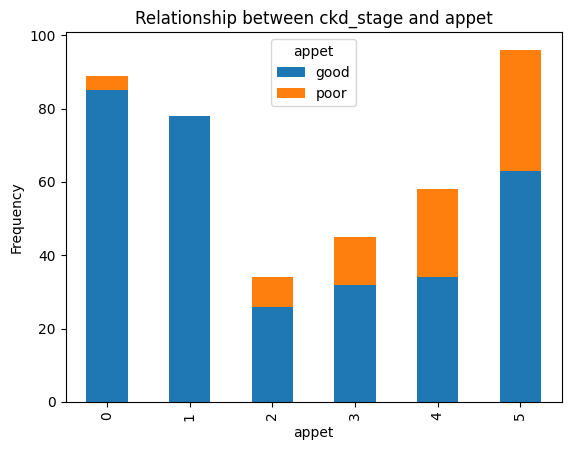

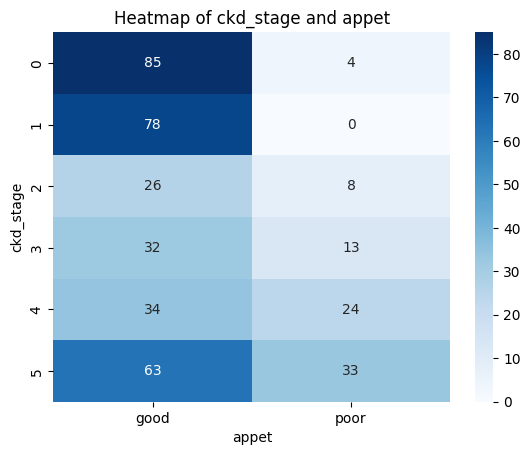

Analyzing relationship between 'ckd_stage' and 'pe':
pe         no  yes
ckd_stage         
0          84    5
1          73    5
2          28    6
3          36    9
4          41   17
5          62   34
Chi-Square Test p-value: 2.089087319767569e-07



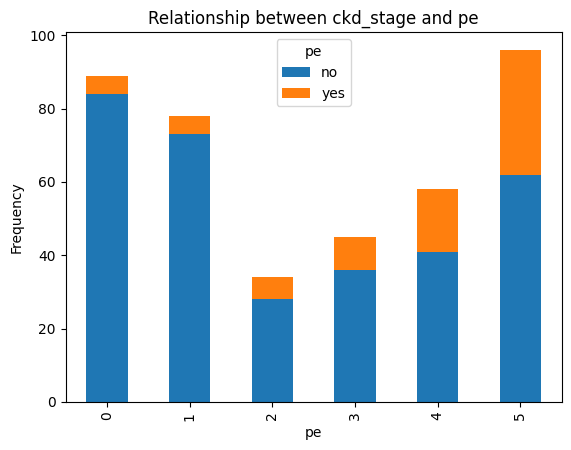

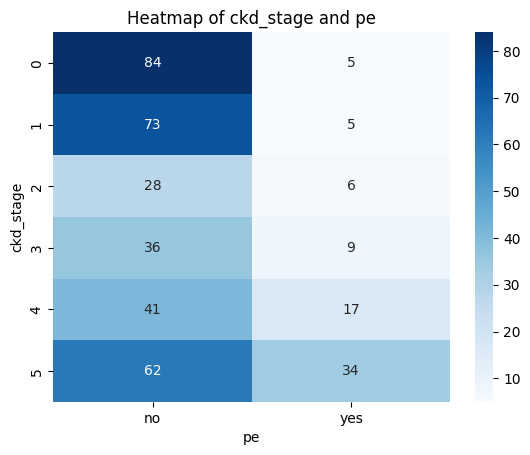

Analyzing relationship between 'ckd_stage' and 'ane':
ane        no  yes
ckd_stage         
0          88    1
1          75    3
2          32    2
3          38    7
4          46   12
5          61   35
Chi-Square Test p-value: 1.5999588878740542e-11



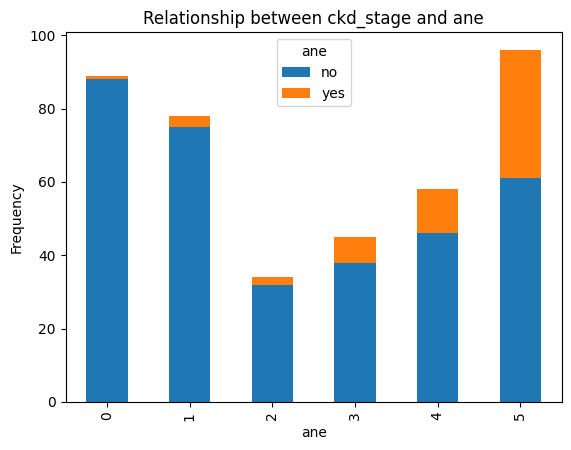

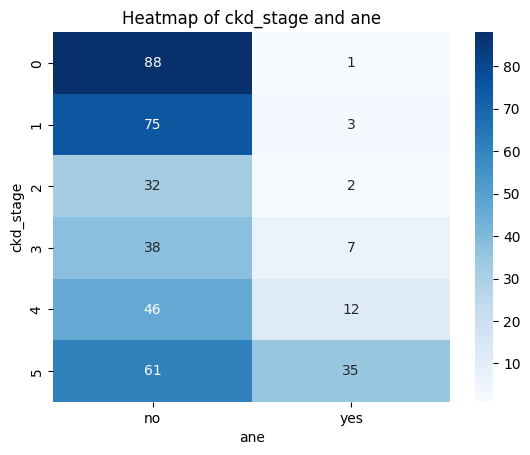

Analyzing relationship between 'ckd_stage' and 'classification':
classification  ckd  notckd
ckd_stage                  
0                18      71
1                19      59
2                20      14
3                45       0
4                58       0
5                90       6
Chi-Square Test p-value: 3.477941029768829e-45



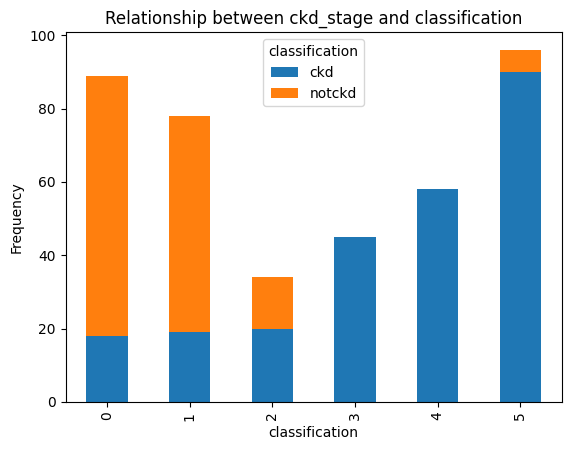

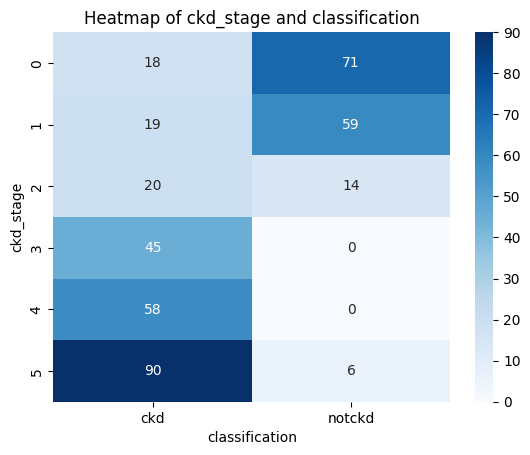

In [55]:

# Identify categorical columns in the dataframe
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Ensure 'ckd_stage' is excluded from the list if it's included
# categorical_columns.remove('ckd_stage')

# 1. Crosstab and Visualization for each categorical column
for col in categorical_columns:
    print(f"Analyzing relationship between 'ckd_stage' and '{col}':")
    
    # Crosstab between 'ckd_stage' and the current categorical column
    crosstab = pd.crosstab(df['ckd_stage'], df[col])
    print(crosstab)
    
    # Perform Chi-Square test
    chi2, p, dof, expected = chi2_contingency(crosstab)
    print(f"Chi-Square Test p-value: {p}\n")
    
    # Plot a stacked bar chart for each categorical variable
    crosstab.plot(kind='bar', stacked=True, title=f'Relationship between ckd_stage and {col}')
    plt.ylabel('Frequency')
    plt.xlabel(col)
    plt.show()
    
    # Optionally, you can plot a heatmap of the contingency table
    sns.heatmap(crosstab, annot=True, cmap='Blues', fmt='d')
    plt.title(f'Heatmap of ckd_stage and {col}')
    plt.show()



#### Correlation Analysis (Numerical Features vs. Target Variable)

Group statistics for 'id' by 'ckd_stage':
           count        mean         std  min     25%    50%     75%    max
ckd_stage                                                                  
0           89.0  290.033708   94.973375  1.0  257.00  316.0  359.00  398.0
1           78.0  266.282051  110.294517  0.0  251.25  296.0  346.50  399.0
2           34.0  210.235294  108.995151  4.0  119.50  231.0  286.25  392.0
3           45.0  127.466667   75.303205  2.0   66.00  138.0  188.00  248.0
4           58.0  130.155172   72.641103  3.0   72.50  130.5  192.25  244.0
5           96.0  133.166667   82.363721  6.0   60.50  129.0  201.50  334.0


Group statistics for 'age' by 'ckd_stage':
           count       mean        std   min    25%   50%    75%   max
ckd_stage                                                             
0           89.0  38.865169  18.009588   9.0  28.00  39.0  51.00  74.0
1           78.0  48.461538  14.140016  22.0  37.75  47.0  58.00  80.0
2           34.0  55.

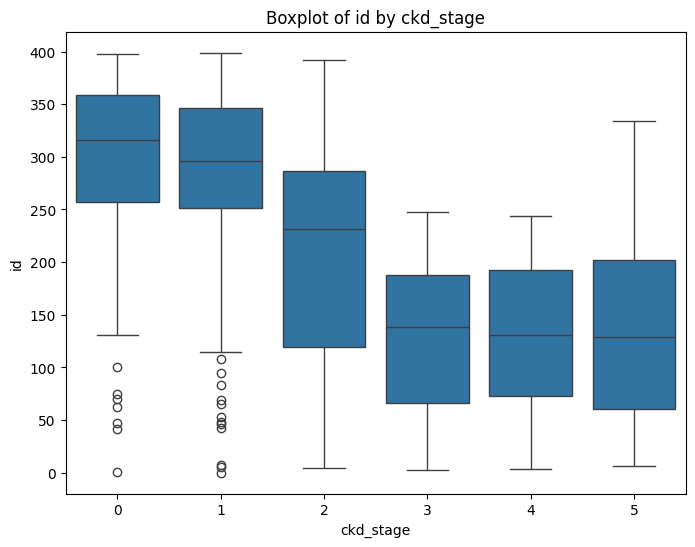

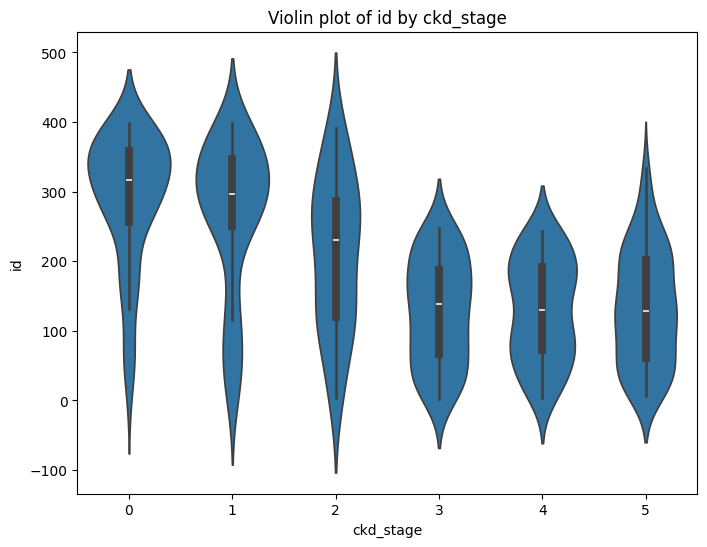

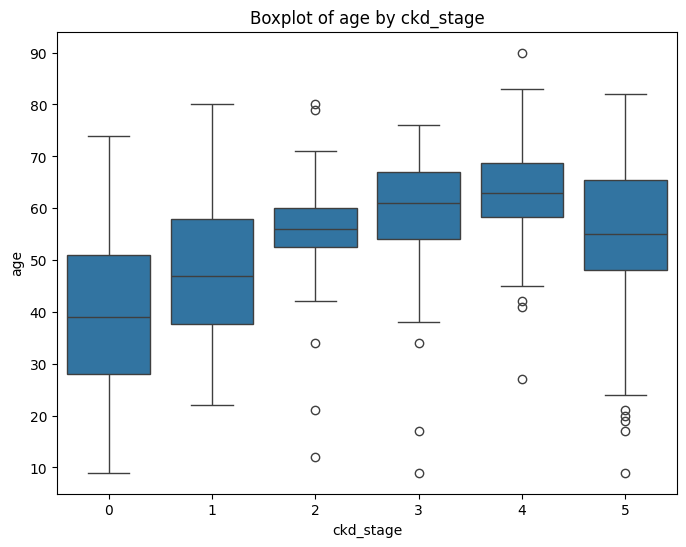

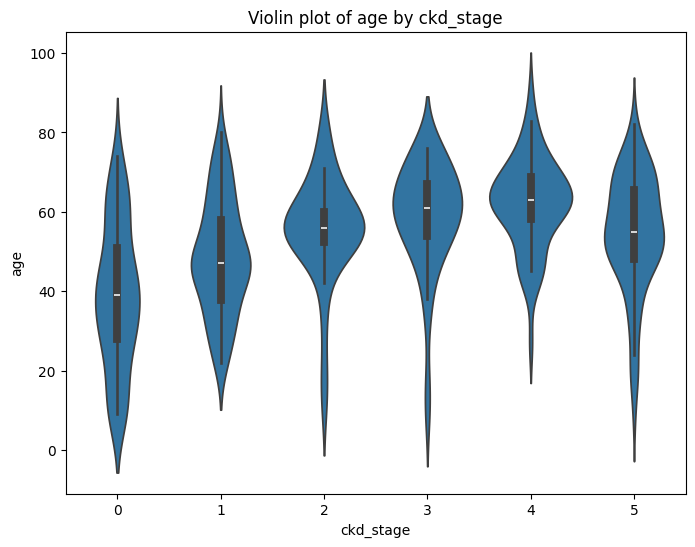

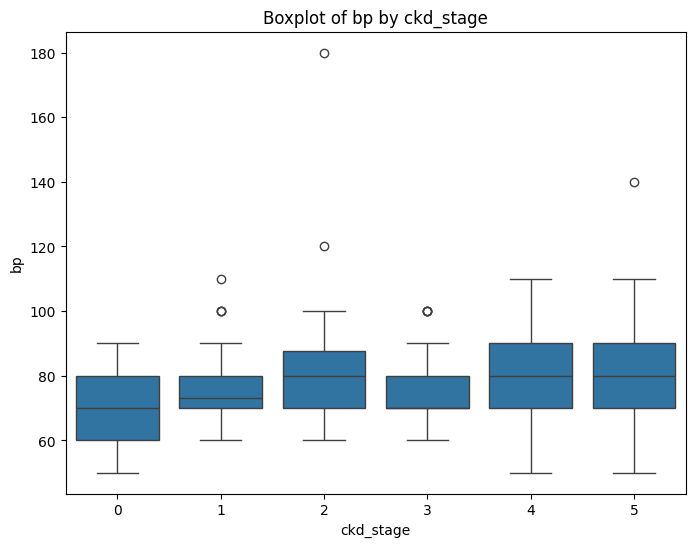

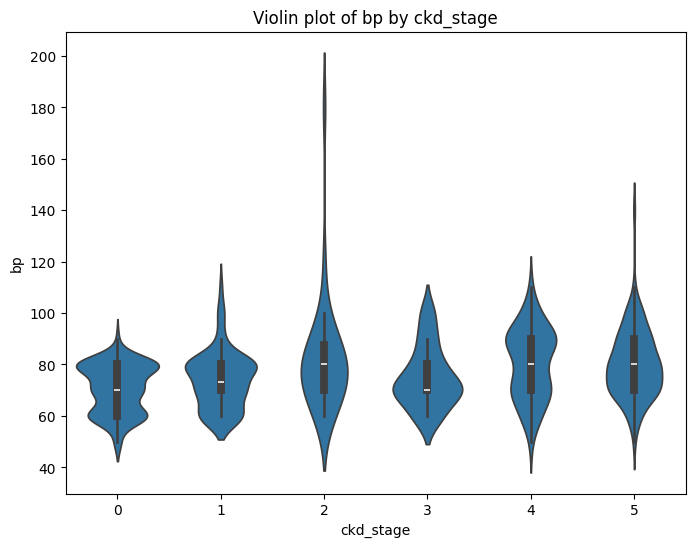

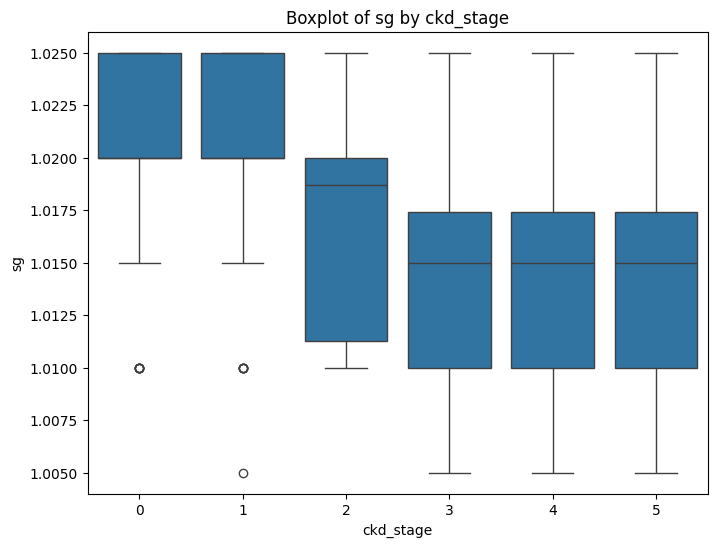

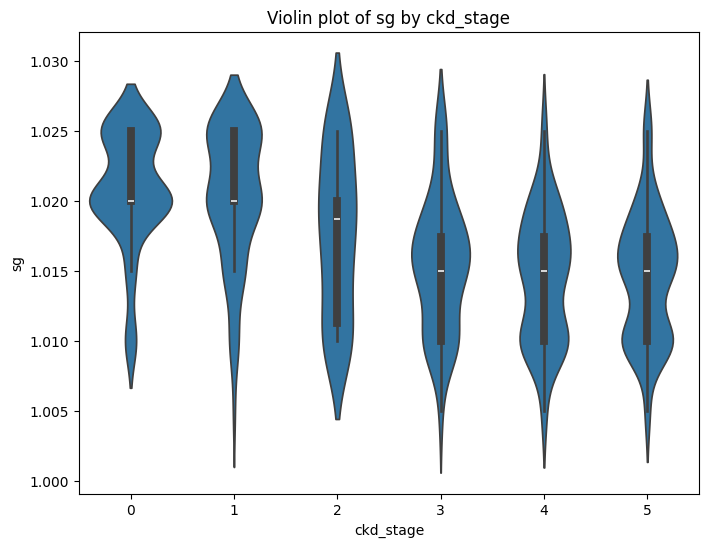

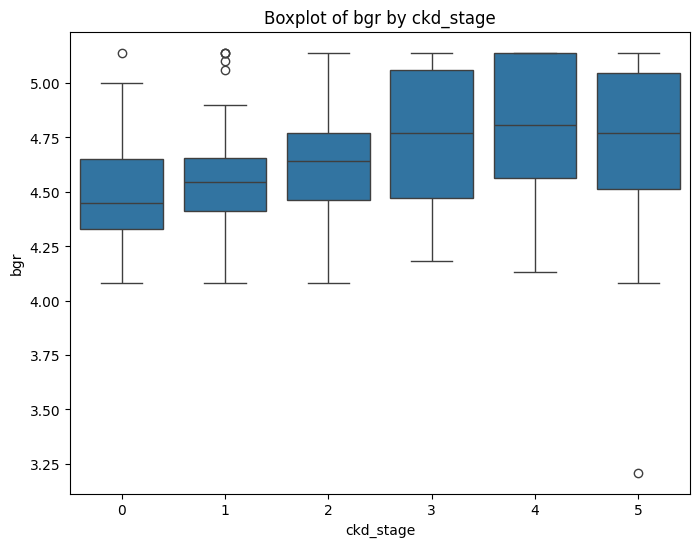

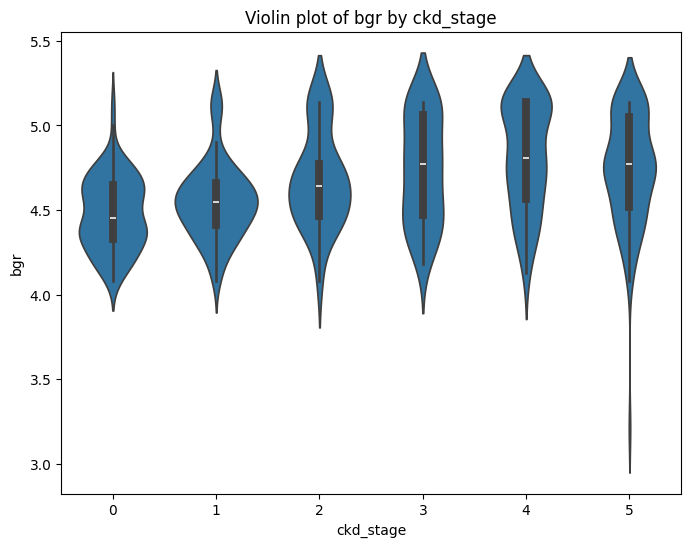

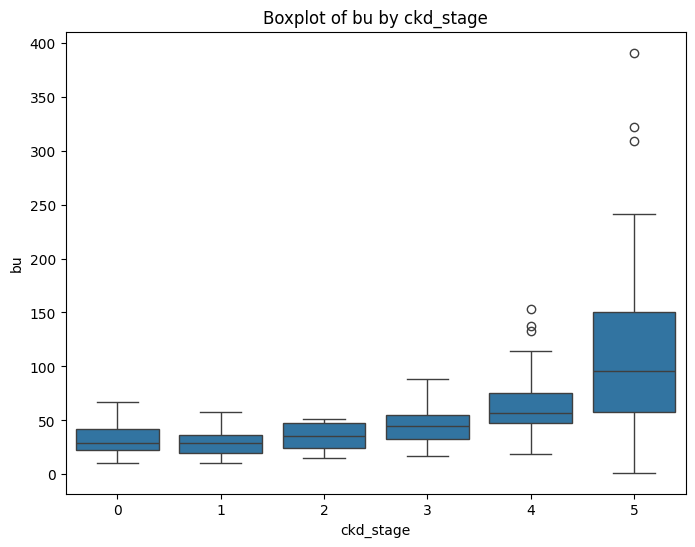

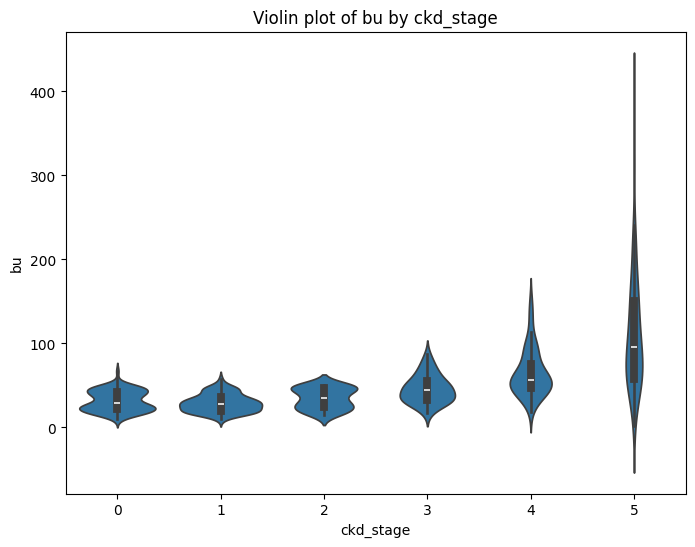

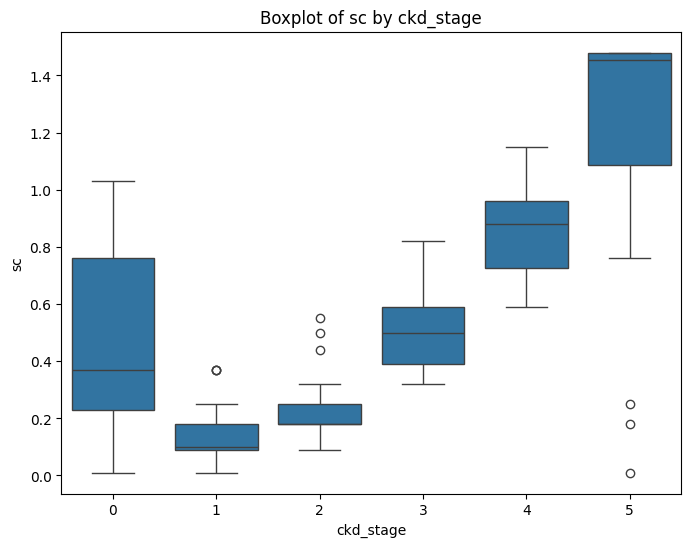

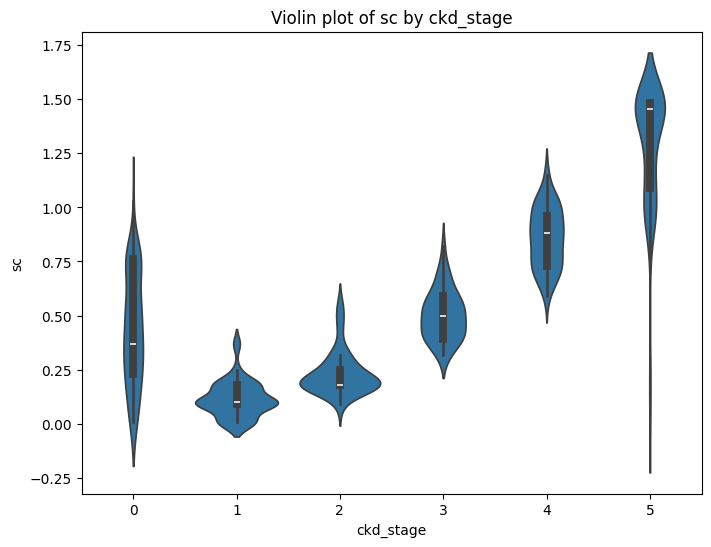

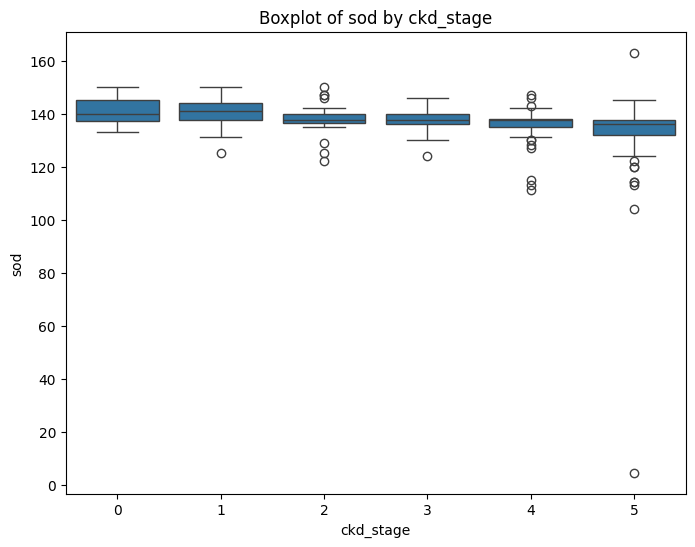

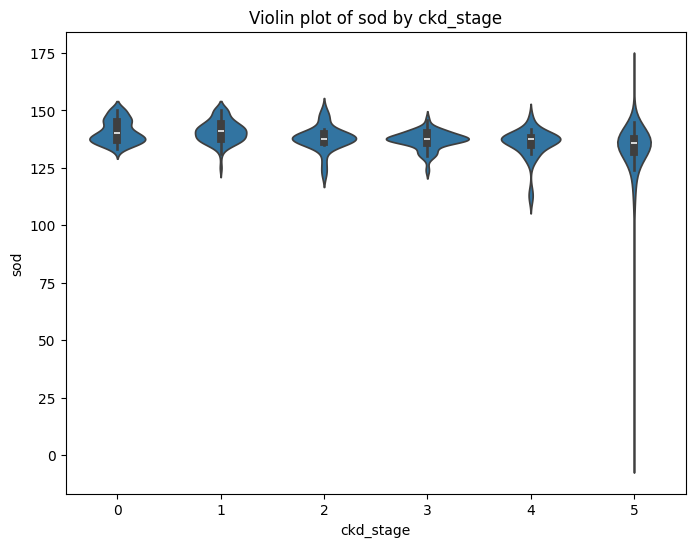

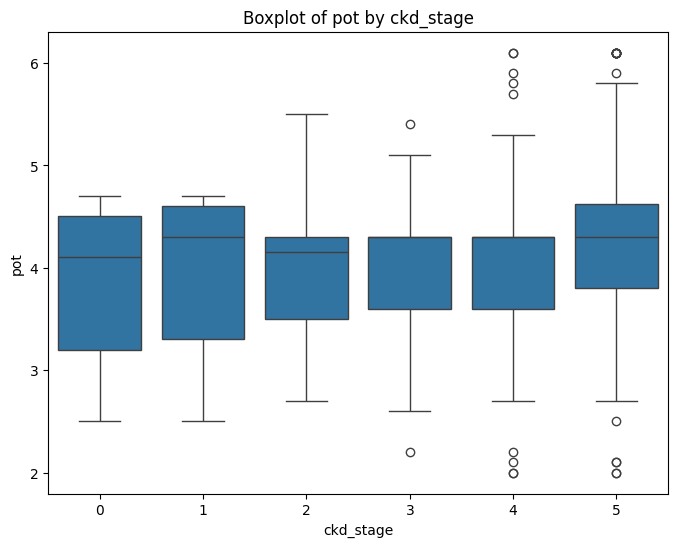

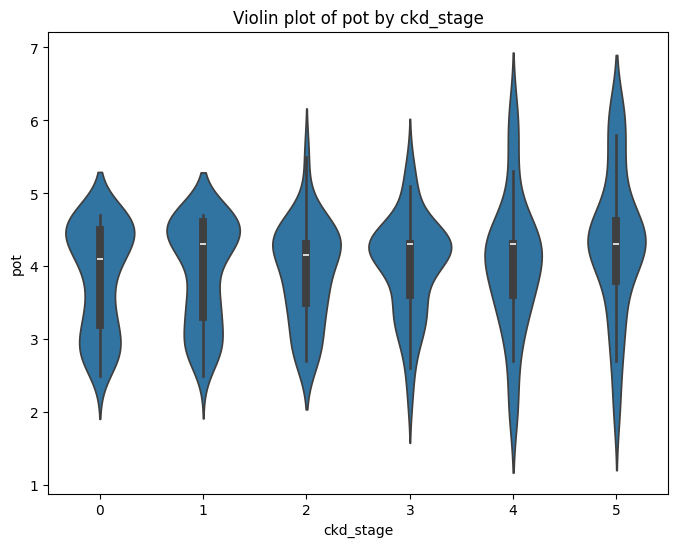

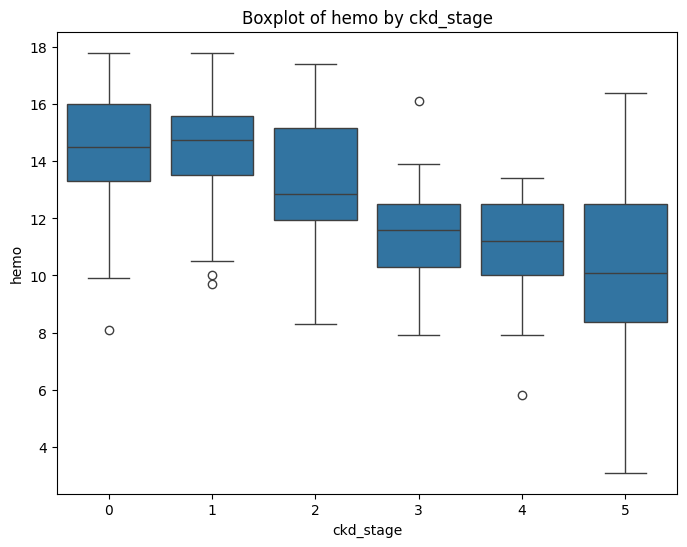

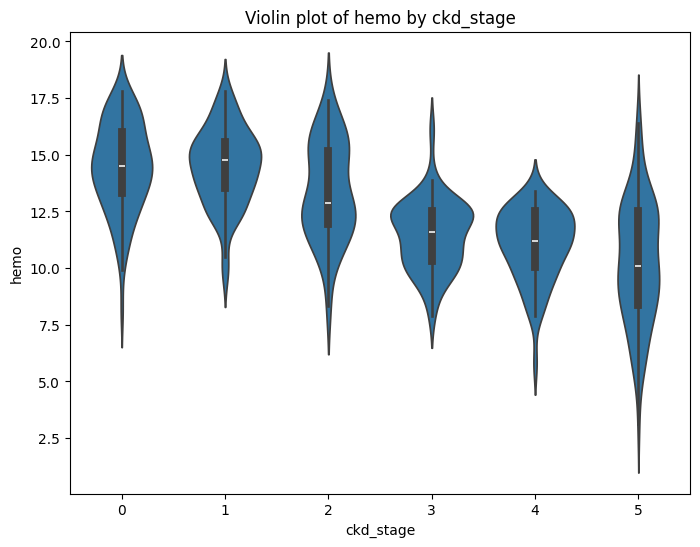

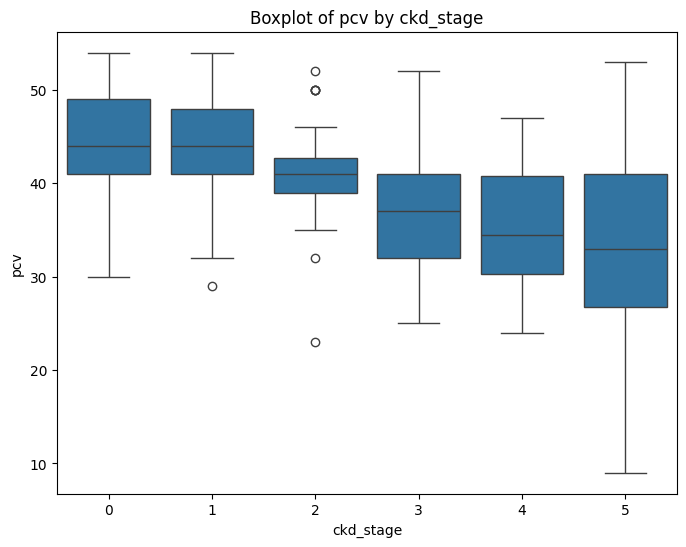

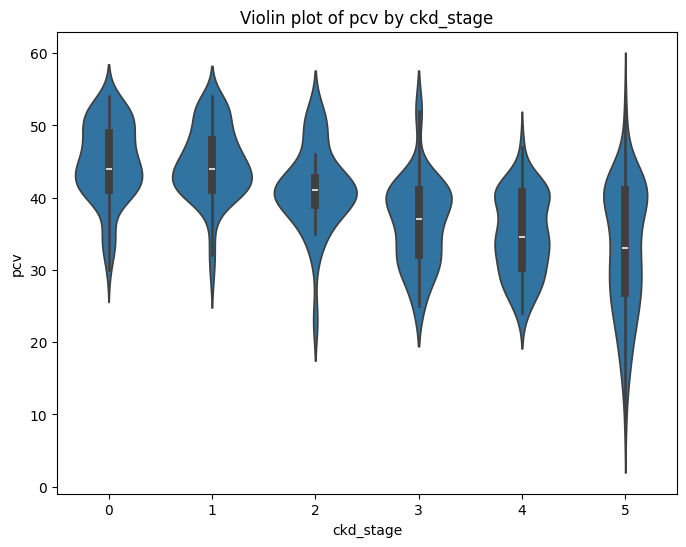

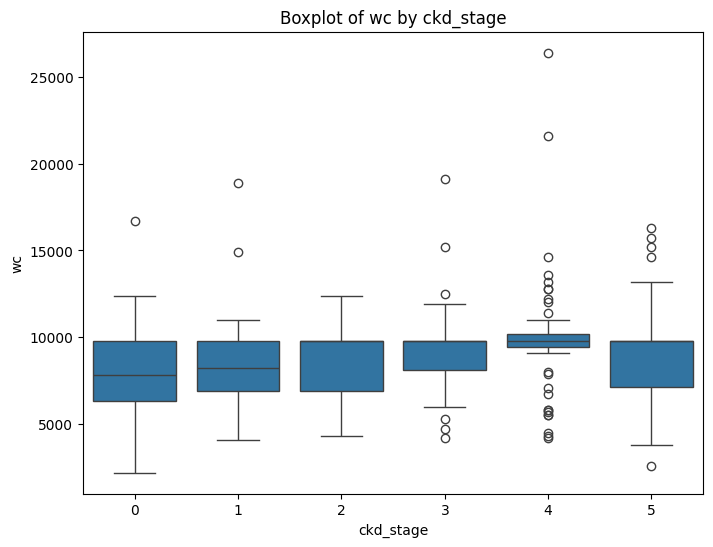

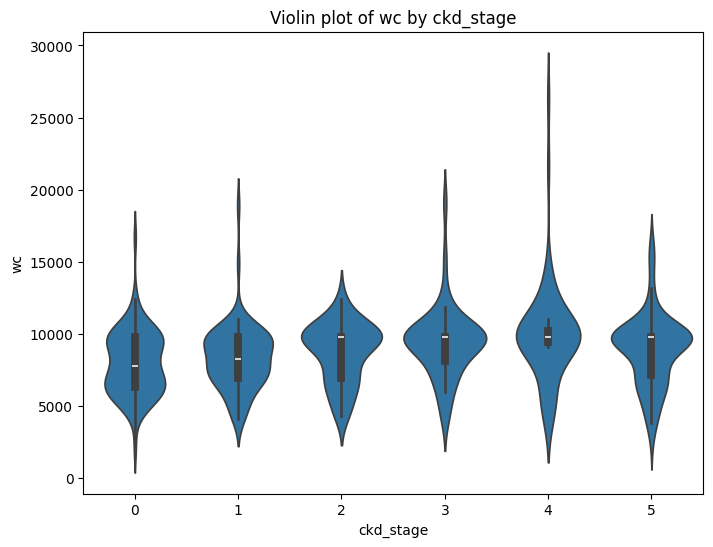

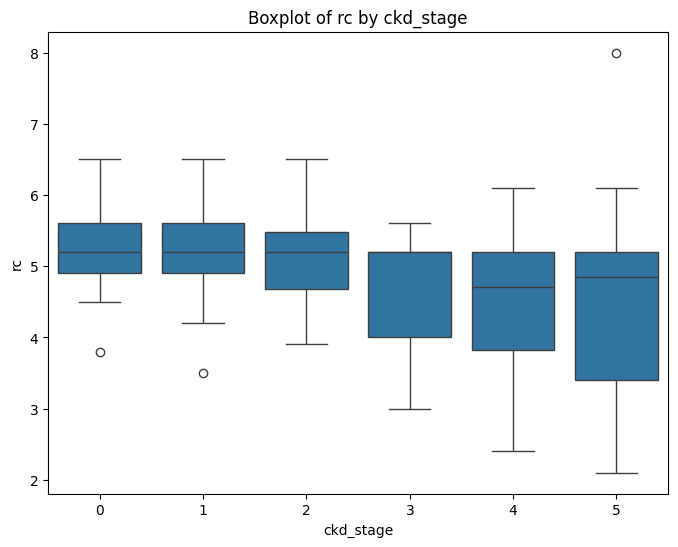

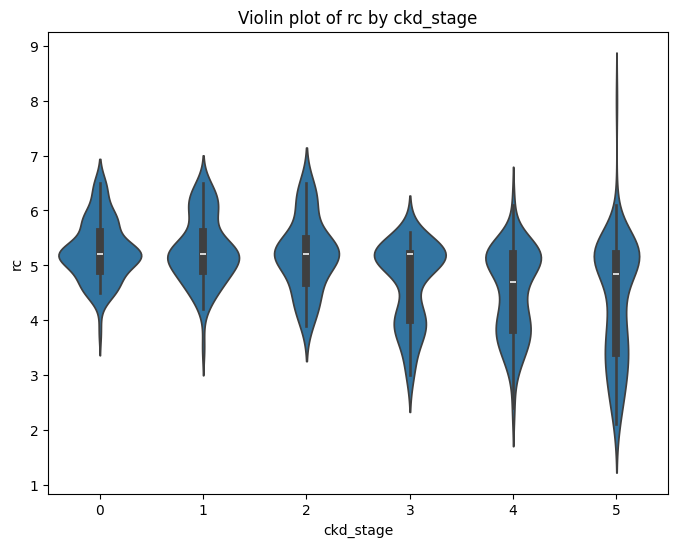

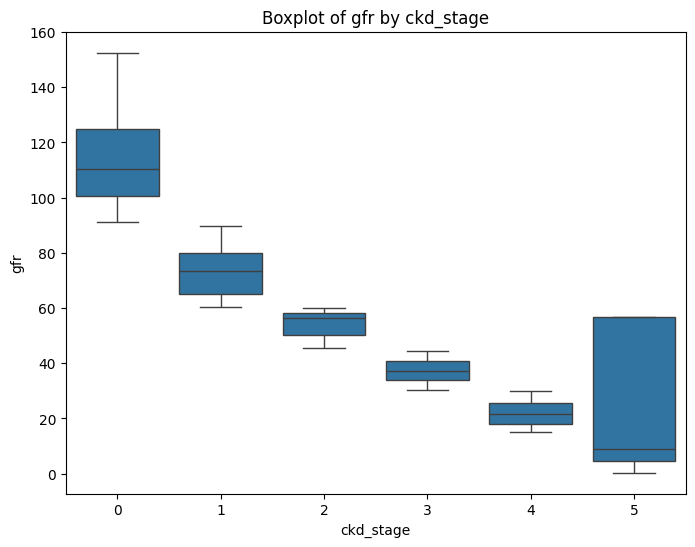

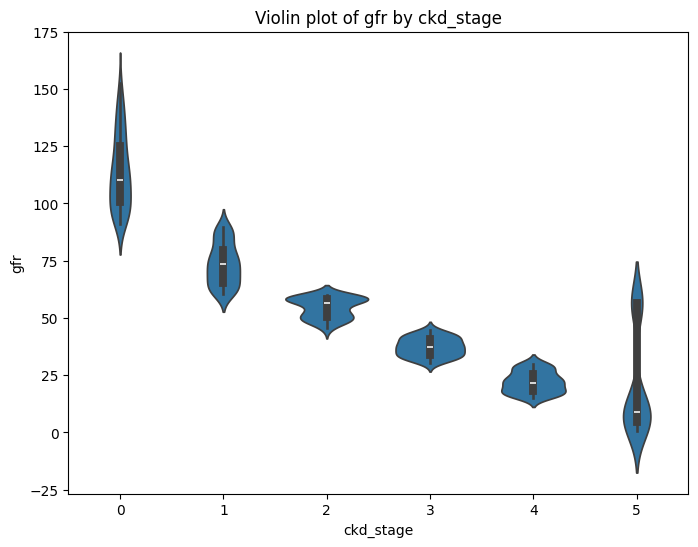

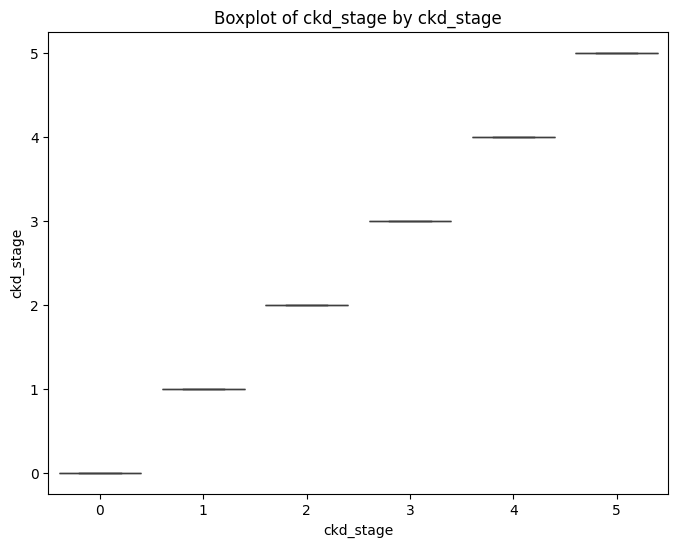

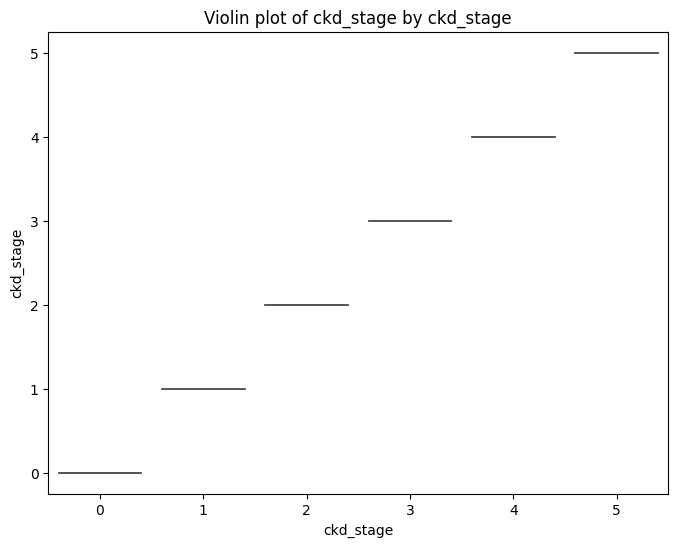

In [56]:

# Identify numerical columns in the dataframe
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# 1. Group-by Statistics
for col in numerical_columns:
    print(f"Group statistics for '{col}' by 'ckd_stage':")
    print(df.groupby('ckd_stage')[col].describe())  # Summary statistics by ckd_stage
    print("\n")

# 2. Perform ANOVA test for each numerical column
for col in numerical_columns:
    groups = [df[df['ckd_stage'] == stage][col].dropna() for stage in df['ckd_stage'].unique()]
    f_stat, p_val = stats.f_oneway(*groups)
    print(f"ANOVA test for '{col}':")
    print(f"F-statistic: {f_stat}, p-value: {p_val}\n")
    if p_val < 0.05:
        print(f"Statistically significant difference found for '{col}' between ckd_stage categories.\n")
    else:
        print(f"No significant difference for '{col}' between ckd_stage categories.\n")

# 3. Visualizations: Box plots and Violin plots
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='ckd_stage', y=col, data=df)
    plt.title(f'Boxplot of {col} by ckd_stage')
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.violinplot(x='ckd_stage', y=col, data=df)
    plt.title(f'Violin plot of {col} by ckd_stage')
    plt.show()


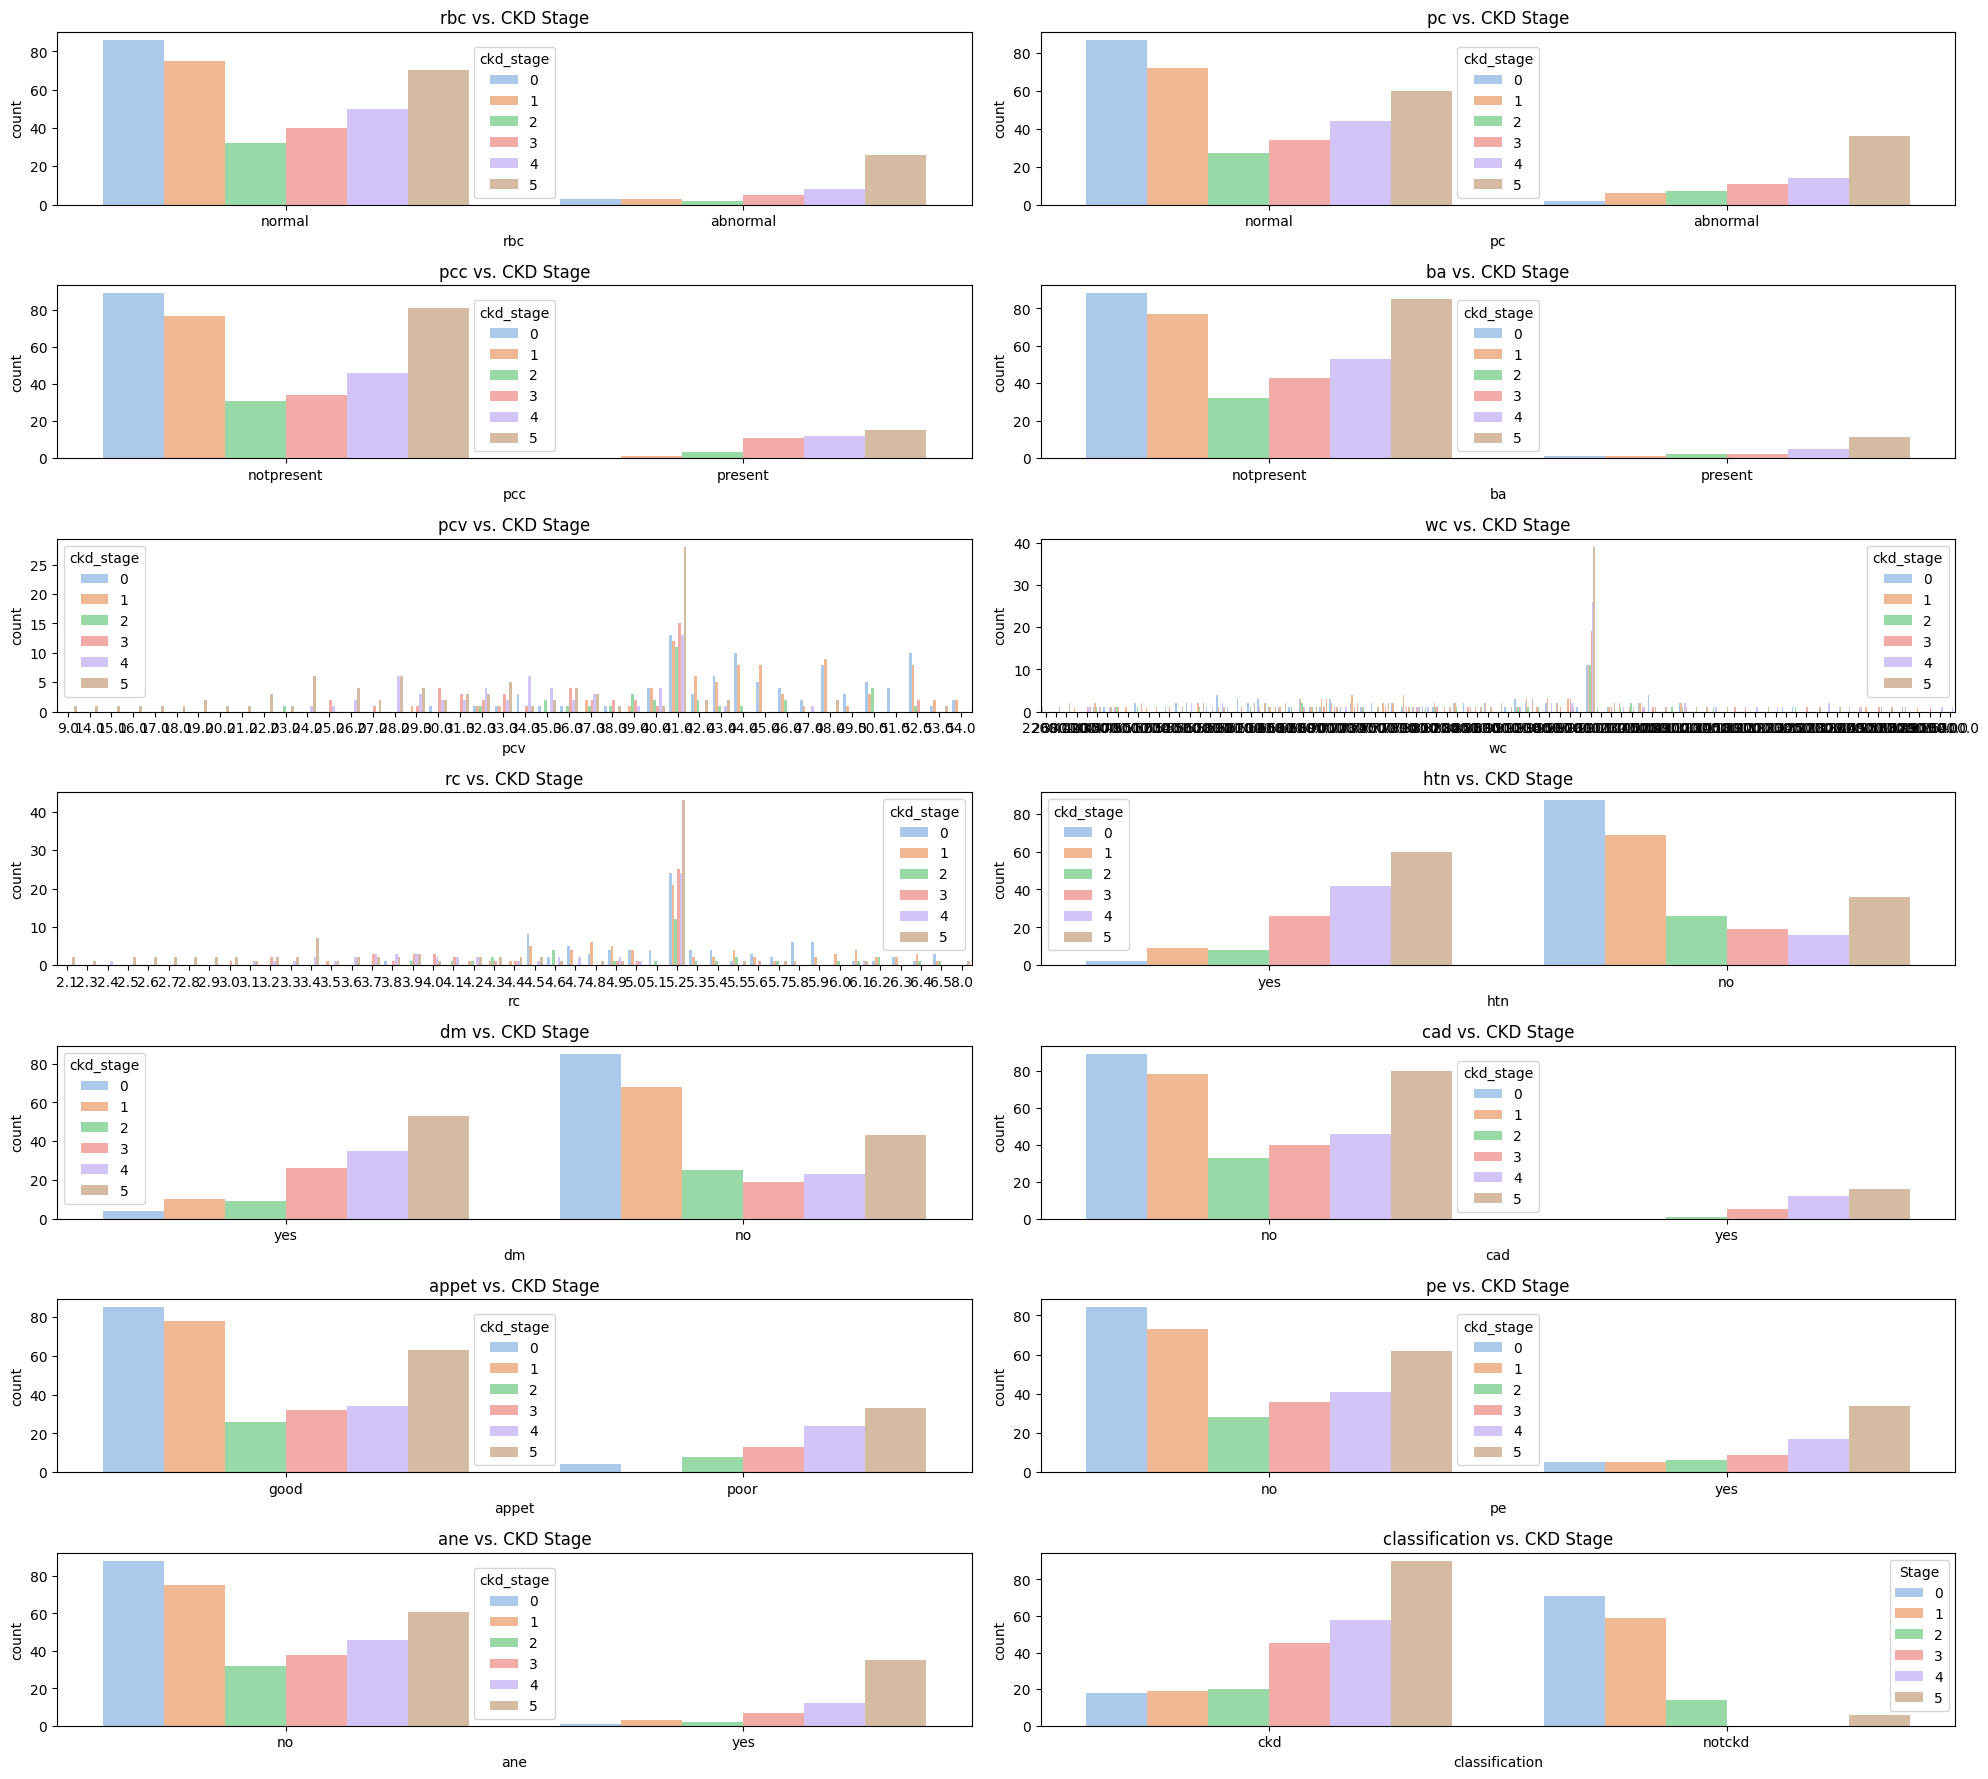

In [57]:


plt.figure(figsize=(20, 20))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(8, 2, i)
    sns.countplot(x=df[col], hue=df["ckd_stage"], palette="pastel")
    plt.title(f"{col} vs. CKD Stage")
plt.legend(title="Stage")
plt.tight_layout()
plt.show()


## **3. Data Preparation**  
- Clean and preprocess data (handle missing values, outliers, and inconsistencies).  
- Convert categorical variables into numerical representations.  
- Normalize and scale continuous variables.  
- Integrate clinical and geographic exposure data into a structured dataset.  
- Split data into training and testing sets.

In [58]:
df.head(25)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,rc,htn,dm,cad,appet,pe,ane,classification,gfr,ckd_stage
0,0,48.0,80.000000,1.020000,1,0,normal,normal,notpresent,notpresent,...,5.2,yes,yes,no,good,no,no,ckd,61.6,1
1,1,9.0,50.000000,1.020000,4,0,normal,normal,notpresent,notpresent,...,5.2,no,no,no,good,no,no,ckd,134.2,0
2,2,62.0,80.000000,1.010000,2,3,normal,normal,notpresent,notpresent,...,5.2,no,yes,no,poor,no,yes,ckd,34.2,3
3,3,48.0,70.000000,1.005000,4,0,normal,abnormal,present,notpresent,...,3.9,yes,no,no,poor,yes,yes,ckd,15.3,4
4,4,51.0,80.000000,1.010000,2,0,normal,normal,notpresent,notpresent,...,4.6,no,no,no,good,no,no,ckd,50.1,2
5,5,60.0,90.000000,1.015000,3,0,normal,normal,notpresent,notpresent,...,4.4,yes,yes,no,good,yes,no,ckd,62.9,1
6,6,68.0,70.000000,1.010000,0,0,normal,normal,notpresent,notpresent,...,5.2,no,no,no,good,no,no,ckd,1.4,5
7,7,24.0,76.469072,1.015000,2,4,normal,abnormal,notpresent,notpresent,...,5.0,no,yes,no,good,yes,no,ckd,81.1,1
8,8,52.0,100.000000,1.015000,3,0,normal,abnormal,present,notpresent,...,4.0,yes,yes,no,good,no,yes,ckd,34.4,3
9,9,53.0,90.000000,1.020000,2,0,abnormal,abnormal,present,notpresent,...,3.7,yes,yes,no,poor,no,yes,ckd,6.8,5


### Clean DF

In [59]:
df['sg'].unique()

array([1.02      , 1.01      , 1.005     , 1.015     , 1.01740793,
       1.025     ])

The unique values in the dataframe represent specific ranges of **specific gravity** (SG), which is a measure used in medical contexts (especially in urinalysis) to assess the concentration of solutes in urine.


- **'1.019 - 1.021'**: This indicates a specific gravity range of **1.019 to 1.021**. It suggests that the concentration of solutes in the urine falls within this specific range.
- **'1.009 - 1.011'**: This indicates a specific gravity range of **1.009 to 1.011**, showing a lower concentration of solutes in the urine compared to the previous range.
- **'1.015 - 1.017'**: This represents a specific gravity range of **1.015 to 1.017**.
- **'≥ 1.023'**: This indicates that the specific gravity is **greater than or equal to 1.023**, meaning the urine has a higher concentration of solutes.
- **'< 1.007'**: This means the specific gravity is **less than 1.007**, which typically indicates very dilute urine with a low concentration of solutes.



In [60]:
df['al'].unique()

array([1, 4, 2, 3, 0, 5])

In [61]:
df.head(10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,rc,htn,dm,cad,appet,pe,ane,classification,gfr,ckd_stage
0,0,48.0,80.000000,1.020,1,0,normal,normal,notpresent,notpresent,...,5.2,yes,yes,no,good,no,no,ckd,61.6,1
1,1,9.0,50.000000,1.020,4,0,normal,normal,notpresent,notpresent,...,5.2,no,no,no,good,no,no,ckd,134.2,0
2,2,62.0,80.000000,1.010,2,3,normal,normal,notpresent,notpresent,...,5.2,no,yes,no,poor,no,yes,ckd,34.2,3
3,3,48.0,70.000000,1.005,4,0,normal,abnormal,present,notpresent,...,3.9,yes,no,no,poor,yes,yes,ckd,15.3,4
4,4,51.0,80.000000,1.010,2,0,normal,normal,notpresent,notpresent,...,4.6,no,no,no,good,no,no,ckd,50.1,2
5,5,60.0,90.000000,1.015,3,0,normal,normal,notpresent,notpresent,...,4.4,yes,yes,no,good,yes,no,ckd,62.9,1
6,6,68.0,70.000000,1.010,0,0,normal,normal,notpresent,notpresent,...,5.2,no,no,no,good,no,no,ckd,1.4,5
7,7,24.0,76.469072,1.015,2,4,normal,abnormal,notpresent,notpresent,...,5.0,no,yes,no,good,yes,no,ckd,81.1,1
8,8,52.0,100.000000,1.015,3,0,normal,abnormal,present,notpresent,...,4.0,yes,yes,no,good,no,yes,ckd,34.4,3
9,9,53.0,90.000000,1.020,2,0,abnormal,abnormal,present,notpresent,...,3.7,yes,yes,no,poor,no,yes,ckd,6.8,5


#### FEature Importance and selection

### **Features That Do Not Contribute Clinically to CKD Progression Prediction**  

In **clinical studies**, certain features may be **irrelevant or redundant** for predicting **CKD progression**. Below are the features **that should be considered for removal**:  

---

### **🔴 Features That Do Not Contribute Clinically**  
| **Feature**      | **Reason for Exclusion** |  
|-----------------|------------------------------------------------|  
| **id**          | Just an identifier; does not contribute to CKD prediction. |  
| **classification** | Redundant; `ckd_stage` already provides CKD severity. |  
| **pcc (Pus Cell Clumps)** | Non-specific indicator; not directly linked to CKD progression. |  
| **ba (Bacteria in Urine)** | Indicates infection but does not define CKD progression. |  

---

### **🟡 Features That May Be Considered for Removal (Based on Correlation & Medical Relevance)**
| **Feature**      | **Decision Criteria** |  
|-----------------|--------------------------------------|  
| **su (Sugar in Urine)** | May be redundant if `dm (Diabetes Mellitus)` is present. |  
| **rbc (Red Blood Cells in Urine)** | Less significant than `hemoglobin` and `pcv`. |  
| **pc (Pus Cells)** | Useful for detecting infection, but weak link to CKD progression. |  

---

### **🟢 Features That Should Be Retained (Clinically Relevant)**  
| **Feature**      | **Reason for Inclusion** |  
|-----------------|------------------------------------------------|  
| **age**         | Age is a major risk factor for CKD progression. |  
| **bp (Blood Pressure)** | Hypertension accelerates CKD progression. |  
| **sg (Specific Gravity)** | Related to kidney function and hydration. |  
| **al (Albumin in Urine)** | Strong indicator of kidney damage. |  
| **bgr (Blood Glucose Random)** | Diabetes is a key risk factor for CKD. |  
| **bu (Blood Urea)** | Urea retention increases with CKD severity. |  
| **sc (Serum Creatinine)** | Critical for estimating GFR and CKD stage. |  
| **sod (Sodium)** | Electrolyte imbalance is common in CKD. |  
| **pot (Potassium)** | CKD patients often have potassium abnormalities. |  
| **hemo (Hemoglobin)** | Anemia is common in CKD progression. |  
| **pcv (Packed Cell Volume)** | Related to anemia and kidney function. |  
| **wc (White Blood Cell Count)** | May indicate inflammation or infection. |  
| **rc (Red Blood Cell Count)** | Related to anemia in CKD patients. |  
| **htn (Hypertension)** | Strongly associated with CKD progression. |  
| **dm (Diabetes Mellitus)** | Diabetes is a leading cause of CKD. |  
| **cad (Coronary Artery Disease)** | Cardiovascular disease is common in CKD patients. |  
| **appet (Appetite)** | Loss of appetite is common in advanced CKD. |  
| **pe (Pedal Edema)** | Fluid retention is a major CKD symptom. |  
| **ane (Anemia)** | CKD progression often leads to anemia. |  
| **gfr (Glomerular Filtration Rate)** | The primary indicator of CKD severity. |  
| **ckd_stage** | Target variable for predicting CKD progression. |  

---

### **✅ Next Steps:**
Would you like to **drop `id`, `classification`, `pcc`, and `ba`** now, or should we validate their correlation with CKD progression before final removal? 🚀

In [62]:

df_duplicate = df.copy()


In [63]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification', 'gfr', 'ckd_stage'],
      dtype='object')

In [64]:
# Identify non-numeric columns
non_numeric_cols = df.select_dtypes(exclude=['number']).columns.tolist()
print("Non-numeric columns:", non_numeric_cols)


Non-numeric columns: ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']


In [65]:

# Define features to drop
features_to_remove = ["id", "classification", "pcc", "ba", "su", "rbc", "pc"]

# Drop selected features
df = df.drop(columns=features_to_remove)


print("Removed irrelevant features.")


Removed irrelevant features.


In [66]:
df.head(10)

,age,bp,sg,al,bgr,bu,sc,sod,pot,hemo,...,wc,rc,htn,dm,cad,appet,pe,ane,gfr,ckd_stage
0,48.0,80.000000,1.020,1,4.58,36.0,0.18,137.5,4.3,15.4,...,7800.0,5.2,yes,yes,no,good,no,no,61.6,1
1,9.0,50.000000,1.020,4,4.77,18.0,0.23,137.5,4.3,11.3,...,6000.0,5.2,no,no,no,good,no,no,134.2,0
2,62.0,80.000000,1.010,2,5.14,53.0,0.55,137.5,4.3,9.6,...,7500.0,5.2,no,yes,no,poor,no,yes,34.2,3
3,48.0,70.000000,1.005,4,4.55,56.0,1.14,111.0,2.0,11.2,...,6700.0,3.9,yes,no,no,poor,yes,yes,15.3,4
4,51.0,80.000000,1.010,2,4.46,26.0,0.32,137.5,4.3,11.6,...,7300.0,4.6,no,no,no,good,no,no,50.1,2
5,60.0,90.000000,1.015,3,4.13,25.0,0.09,142.0,2.5,12.2,...,7800.0,4.4,yes,yes,no,good,yes,no,62.9,1
6,68.0,70.000000,1.010,0,4.41,54.0,1.48,104.0,3.5,12.4,...,9800.0,5.2,no,no,no,good,no,no,1.4,5
7,24.0,76.469072,1.015,2,5.14,31.0,0.09,137.5,4.3,12.4,...,6900.0,5.0,no,yes,no,good,yes,no,81.1,1
8,52.0,100.000000,1.015,3,4.70,60.0,0.59,137.5,4.3,10.8,...,9600.0,4.0,yes,yes,no,good,no,yes,34.4,3
9,53.0,90.000000,1.020,2,4.08,107.0,1.48,114.0,3.1,9.5,...,12100.0,3.7,yes,yes,no,poor,no,yes,6.8,5


## **4. Modeling**  
- Select appropriate machine learning algorithms (e.g., Random Forest, XGBoost, SVM).  
- Train models using different techniques (e.g., supervised learning).  
- Optimize hyperparameters for improved performance.  
- Handle class imbalance (if necessary).  

In [67]:

# Define categorical and numerical features
categorical_features = ["htn", "dm", "cad", "appet", "pe", "ane"]
numerical_features = [col for col in df.columns if col not in categorical_features + ["ckd_stage"]]

# Define preprocessing steps
preprocessor = ColumnTransformer([
    ("one_hot", OneHotEncoder(drop="first"), categorical_features),  # One-Hot Encoding
    ("scaler", StandardScaler(), numerical_features)  # Scaling numerical features
])

# Define models (pipelines)
pipelines = {
    "Random Forest": Pipeline([("preprocessing", preprocessor), ("classifier", RandomForestClassifier(n_estimators=100, random_state=42))]),
    "XGBoost": Pipeline([("preprocessing", preprocessor), ("classifier", XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric="mlogloss"))]),
    "LightGBM": Pipeline([("preprocessing", preprocessor), ("classifier", LGBMClassifier(n_estimators=100, random_state=42))]),
    "SVM": Pipeline([("preprocessing", preprocessor), ("classifier", SVC(probability=True, random_state=42))]),
    "Logistic Regression": Pipeline([("preprocessing", preprocessor), ("classifier", LogisticRegression(max_iter=500, random_state=42))])
}

# Define target and features
X = df.drop(columns=["ckd_stage"])
y = df["ckd_stage"]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train models 
for model_name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)  # Train the model



print("\n✅ All models have been trained")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000988 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 588
[LightGBM] [Info] Number of data points in the train set: 320, number of used features: 20
[LightGBM] [Info] Start training from score -1.505641
[LightGBM] [Info] Start training from score -1.625186
[LightGBM] [Info] Start training from score -2.472484
[LightGBM] [Info] Start training from score -2.184802
[LightGBM] [Info] Start training from score -1.939680
[LightGBM] [Info] Start training from score -1.424516
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

## **5. Evaluation**  
- Assess model performance using metrics like accuracy, sensitivity, specificity, and ROC AUC.  
- Use cross-validation techniques to improve generalizability.  
- Compare multiple models to select the best-performing one. 


🔹 Evaluating Model: Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        15
           2       0.78      1.00      0.88         7
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00        12
           5       1.00      0.89      0.94        19

    accuracy                           0.97        80
   macro avg       0.96      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



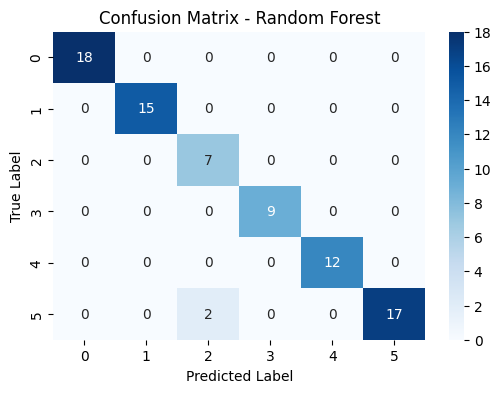


🔹 Evaluating Model: XGBoost
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.93      0.97        15
           2       0.70      1.00      0.82         7
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00        12
           5       1.00      0.89      0.94        19

    accuracy                           0.96        80
   macro avg       0.95      0.97      0.96        80
weighted avg       0.97      0.96      0.96        80



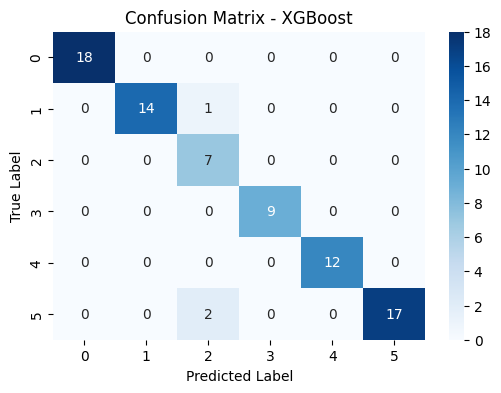


🔹 Evaluating Model: LightGBM
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        15
           2       0.78      1.00      0.88         7
           3       1.00      0.89      0.94         9
           4       0.92      1.00      0.96        12
           5       1.00      0.89      0.94        19

    accuracy                           0.96        80
   macro avg       0.95      0.96      0.95        80
weighted avg       0.97      0.96      0.96        80



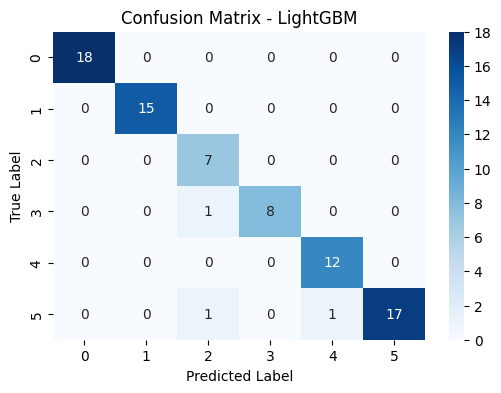


🔹 Evaluating Model: SVM
              precision    recall  f1-score   support

           0       1.00      0.83      0.91        18
           1       0.62      1.00      0.77        15
           2       0.00      0.00      0.00         7
           3       0.64      0.78      0.70         9
           4       0.78      0.58      0.67        12
           5       0.74      0.74      0.74        19

    accuracy                           0.72        80
   macro avg       0.63      0.66      0.63        80
weighted avg       0.71      0.72      0.70        80



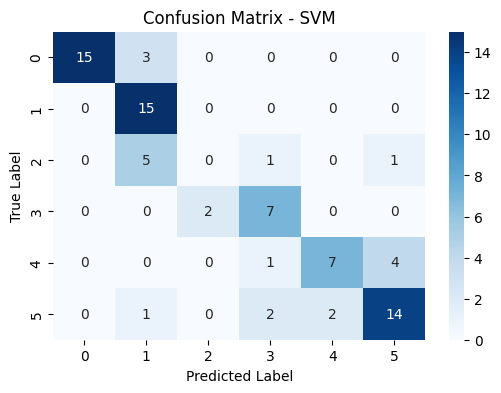


🔹 Evaluating Model: Logistic Regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.83      1.00      0.91        15
           2       0.60      0.43      0.50         7
           3       0.70      0.78      0.74         9
           4       0.89      0.67      0.76        12
           5       0.80      0.84      0.82        19

    accuracy                           0.84        80
   macro avg       0.80      0.79      0.79        80
weighted avg       0.84      0.84      0.83        80



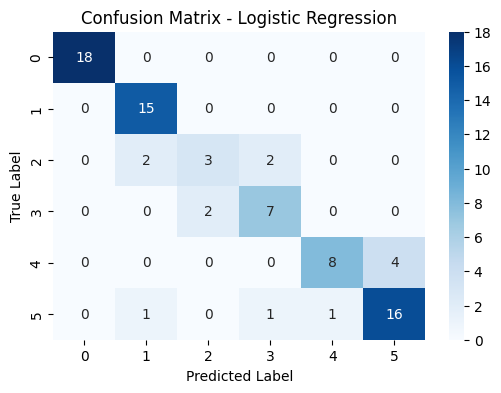


🔹 Model Comparison Results:


,Model,Accuracy,Precision,Recall,F1 Score,AUC-ROC
0,Random Forest,0.9750,0.980556,0.9750,0.975868,0.992579
1,XGBoost,0.9625,0.973750,0.9625,0.964899,0.997790
2,LightGBM,0.9625,0.969017,0.9625,0.963250,0.999508
3,SVM,0.7250,0.705445,0.7250,0.702526,0.949248
4,Logistic Regression,0.8375,0.835833,0.8375,0.831257,0.966142


In [68]:
# Store evaluation results
results = []

# Evaluate each trained model
for model_name, pipeline in pipelines.items():
    print(f"\n🔹 Evaluating Model: {model_name}")

    # Make predictions
    y_pred = pipeline.predict(X_test)
    y_prob = pipeline.predict_proba(X_test) if hasattr(pipeline.named_steps["classifier"], "predict_proba") else None

    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    auc_roc = roc_auc_score(y_test, y_prob, multi_class="ovr") if y_prob is not None else "N/A"

    # Store results in a list
    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "AUC-ROC": auc_roc
    })

    # Print classification report
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display results
print("\n🔹 Model Comparison Results:")
results_df



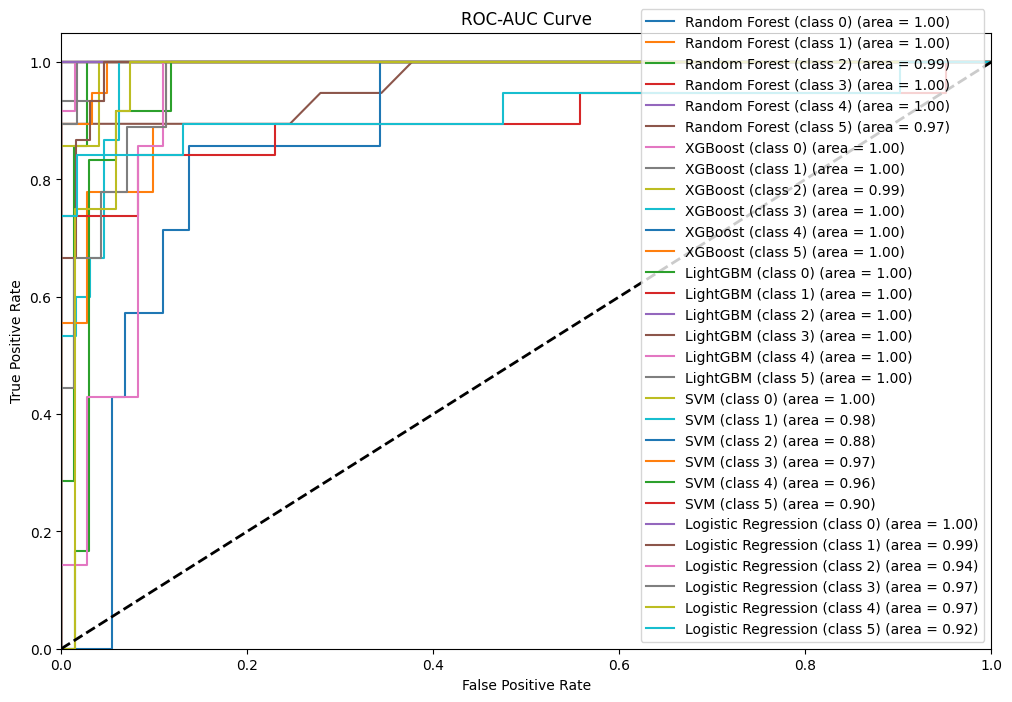

In [69]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Plot ROC-AUC curves for each model
plt.figure(figsize=(12, 8))

for model_name, pipeline in pipelines.items():
    if hasattr(pipeline.named_steps["classifier"], "predict_proba"):
        y_prob = pipeline.predict_proba(X_test)
        fpr = {}
        tpr = {}
        roc_auc = {}
        for i in range(len(np.unique(y))):
            fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
            plt.plot(fpr[i], tpr[i], label=f'{model_name} (class {i}) (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc="lower right")
plt.show()

In [71]:
# Save results to CSV
results_df.to_csv(r"C:\Users\user\Desktop\Detection-of-CKD-Progression\Analysis\model_comparison_results.csv", index=False)
print("\n✅ Model comparison completed. Results saved to 'model_comparison_results.csv'.")


✅ Model comparison completed. Results saved to 'model_comparison_results.csv'.


## **6. Deployment**  
- Prepare the model for real-world implementation.  
- Consider deploying the model via Streamlit, FastAPI, or a healthcare dashboard.  
- Ensure model interpretability for healthcare professionals.  
- Discuss ethical considerations and recommendations for future use. 

In [72]:

# Define the directory where the models will be saved
save_directory = r"C:\Users\user\Desktop\Detection-of-CKD-Progression\Models"

# Save each trained model pipeline
for model_name, pipeline in pipelines.items():
    save_path = f"{save_directory}\\{model_name.replace(' ', '_')}_pipeline.pkl"
    joblib.dump(pipeline, save_path)

print("\n✅ All models have been saved to the specified directory.")


✅ All models have been saved to the specified directory.
